**DATASET**

BBBC038

# Pasos previos

### Instalaciones

In [62]:
#pip install keras-tqdm

### Librerías generales

In [1]:
# Librerías generales
import os
import sys
import random
import pathlib

import warnings
warnings.filterwarnings('ignore')

seed = 3
random.seed=seed

### Definición de rutas

In [2]:
# Definición de los directorios base
TRAINING_FOLDER = 'Dataset/BBBC038/stage1_train/'
TESTING_FOLDER = 'Dataset/BBBC038/stage1_test/'
TRAINING_IDs = os.listdir(TRAINING_FOLDER)
TESTING_IDs = os.listdir(TESTING_FOLDER)

In [3]:
# Ruta de las imágenes training (global)
images_paths = pathlib.Path(TRAINING_FOLDER).glob('*/images/*.png')
images_paths_list = list(images_paths)

In [4]:
#Ruta de las masks
masks_paths = pathlib.Path(TRAINING_FOLDER).glob('*')
masks_paths_list = list(masks_paths)

Como solo nos dan las masks, debemos contar el número de masks de cada imagen para saber cuántos nuclei han detectado los expertos en esa imagen.

# Obtención y preprocesamiento de imágenes

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed=seed

In [6]:
numero_imagenes_train=len(TRAINING_IDs)
print('Número de imágenes de training: ', numero_imagenes_train)
numero_imagenes_test=len(TESTING_IDs)
print('Número de imágenes de testing: ', numero_imagenes_test)

Número de imágenes de training:  670
Número de imágenes de testing:  65


In [7]:
# Obtener y normalizar imágenes y masks
from tqdm import tqdm_notebook as tqdm #El código se desarrolla en un notebook
from skimage.io import imread, imshow, imread_collection, concatenate_images
import glob

warnings.simplefilter("ignore", UserWarning)

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

X_train = np.zeros((len(TRAINING_IDs), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(TRAINING_IDs), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Adquiriendo y normalizando las imágenes y masks de entrenamiento ... ')
sys.stdout.flush()
for n in tqdm(range(numero_imagenes_train)):
    im_path=images_paths_list[n]
    img = imread(im_path)[:,:,:IMG_CHANNELS]
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    
    msk_path = masks_paths_list[n]
    numero_masks = len(glob.glob(str(msk_path)+'/masks/*.png'))
    maasks_paaths = pathlib.Path(str(msk_path)+'/masks/').glob('*.png')
    maasks_paaths_list = list(maasks_paaths)
    
    for m in range(numero_masks):
        maaasks_path=maasks_paaths_list[m]
        mask_ = imread(maaasks_path)
        mask_ = np.expand_dims(cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Get and resize test images
X_test = np.zeros((len(TESTING_IDs), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Adquiriendo y normalizando las imágenes de test ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(TESTING_IDs), total=len(TESTING_IDs)):
    path = TESTING_FOLDER + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA)
    X_test[n] = img

print('Finalizado con éxito.')

Adquiriendo y normalizando las imágenes y masks de entrenamiento ... 



Adquiriendo y normalizando las imágenes de test ... 



Finalizado con éxito.


### Vista rápida del dataset

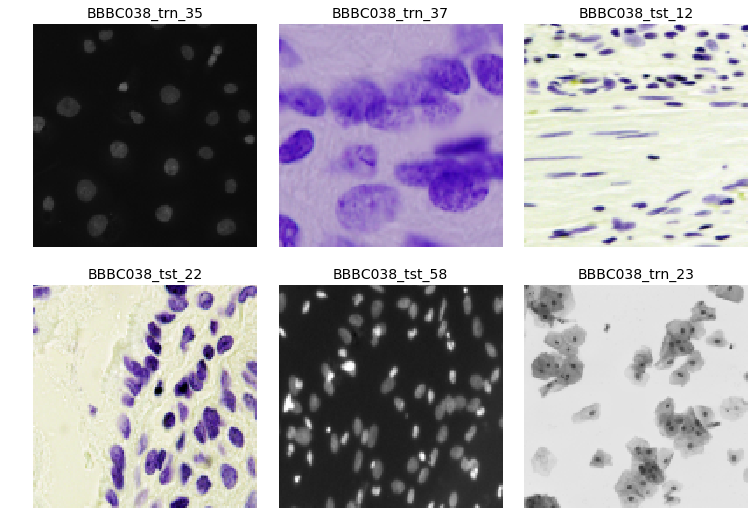

In [8]:
############## CELDA CREADA PARA SACAR IMÁGENES PARA LA MEMORIA ##############
z = 35
x = 37
c = 12
v = 22
b = 58
n = 23

plt.figure(figsize=(6.4*2, 4.8*2))
plt.subplots_adjust(wspace=0.1, hspace=0) 


plt.subplot(2,3,1)
plt.imshow(X_train[z])
plt.title('BBBC038_trn_35', fontsize=14)
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(X_train[x])
plt.title('BBBC038_trn_37', fontsize=14)
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(X_test[c])
plt.title('BBBC038_tst_12', fontsize=14)
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(X_test[v])
plt.title('BBBC038_tst_22', fontsize=14)
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(X_test[b])
plt.title('BBBC038_tst_58', fontsize=14)
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(X_train[n])
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('BBBC038_trn_23', fontsize=14)
plt.axis('off')

plt.show()

### Mostrar una imagen original del Dataset

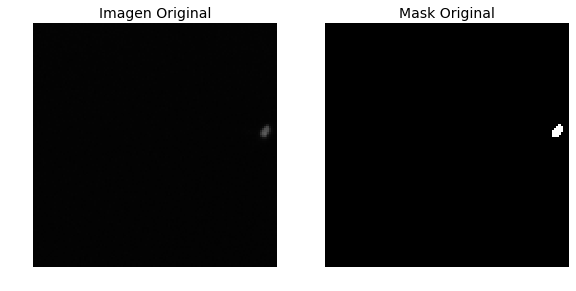

Formato original de imagen:  (128, 128, 3)
Número de nuclei de esta imagen:  1


In [232]:
#Para la comprobación de la obtención y preprocesamiento

a = 385

original_image = X_train[a]
mask_original_image = np.squeeze(Y_train[a])

#El número de masks son los mask que separó el experto en la carpeta
numero_masks=len(glob.glob(str(masks_paths_list[a])+'/masks/*.png'))

#Mostrar imagen original y su mask
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title('Imagen Original', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask_original_image, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Mask Original', fontsize=14)
plt.axis('off')

plt.show()

print('Formato original de imagen: ',X_train[a].shape)
print('Número de nuclei de esta imagen: ', numero_masks)

# Para consultar la carpeta en la que se encuentra la imagen:
# images_paths_list[a]   --> Carpeta de la imagen
# masks_paths_list[a]    --> Carpeta anterior a las masks de la imagen
# El ID debe coincidir para que la medida sea correcta

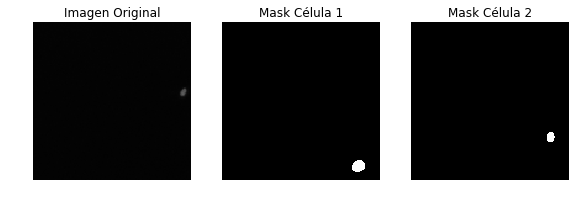

In [233]:
############## CELDA CREADA PARA SACAR IMÁGENES PARA LA MEMORIA ##############

maask_1 = imread(str(masks_paths_list[35])+'/masks/78cee154fcc3b599af6ef78e35166e9b1b4f286f5573fb2721e094c42b387b36.png')
maask_2 = imread(str(masks_paths_list[35])+'/masks/83036d193f64836d161ad004205053c40d54e05ea8c1ac3046267a80df6c36f1.png')

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(maask_1, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Mask Célula 1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(maask_2, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Mask Célula 2')
plt.axis('off')

plt.show()

In [234]:
from scipy import ndimage

labels_mask,nlabels_mask=ndimage.label(mask_original_image)
print('Se han detectado',nlabels_mask,'nuclei distintos, de ', numero_masks,' que detecta el experto.')
desv= numero_masks-nlabels_mask
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de  1  que detecta el experto.

El resultado se ha desviado 0 unidades.


### Pasar la imagen original a blanco y negro

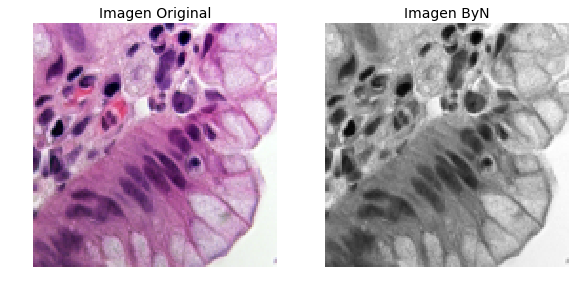

Formato de imagen en blanco y negro:  (128, 128)


In [235]:
############## CELDA CREADA PARA SACAR IMÁGENES PARA LA MEMORIA ##############
#Pasamos de BGR a blanco y negro con OpenCV
gray_image = cv2.cvtColor(X_test[5],cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,2,1)
plt.imshow(X_test[5])
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Imagen ByN', fontsize=14)
plt.axis('off')

plt.show()

print('Formato de imagen en blanco y negro: ',gray_image.shape)

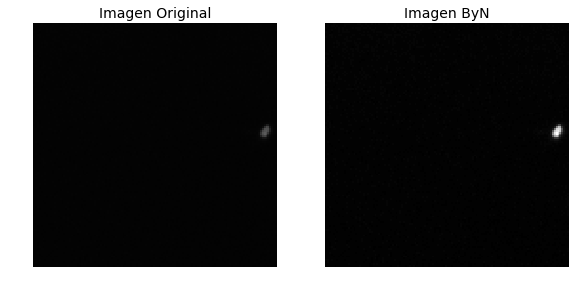

Formato de Vimagen en blanco y negro:  (128, 128)


In [236]:
#Pasamos de BGR a blanco y negro con OpenCV
gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title('Imagen Original', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Imagen ByN', fontsize=14)
plt.axis('off')

plt.show()

print('Formato de Vimagen en blanco y negro: ',gray_image.shape)

Pasar la imagen a blanco y negro, por lo que los píxeles solo nos dan información de la intensidad (luminosidad). El negro sería un valor 0 y el blanco sería el máximo valor, la escala de grises tendría valores intermedios.

Podemos mostrar la distribución de los valores de intensidad de los píxeles

### Filtro Gaussiano

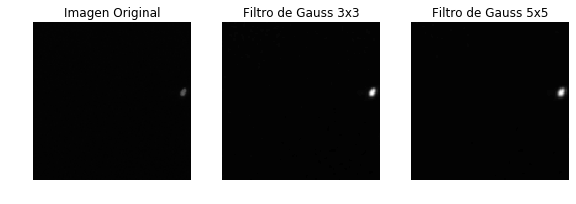

In [237]:
gaus_blur = cv2.GaussianBlur(gray_image,(3,3),0)
gaus_blur_2 = cv2.GaussianBlur(gray_image,(5,5),0)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaus_blur, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Filtro de Gauss 3x3')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaus_blur_2, cmap='gray')
#plt.contour(mask_original_image, levels=np.arange(0,1,0.2), colors='red') #Contorno
plt.title('Filtro de Gauss 5x5')
plt.axis('off')

plt.show()

# Pure Image Processing

Se plantean varias opciones a la hora de realizar un procesamiento de imagen puro.

    A) Otsu's Method

    Gráfico que muestre la distribución de la intensidad. El número de píxeles que ocupe la luminosidad 0 debe ser el máximo, ya que correspondería al background de la imagen. Para elegir el threshold donde separamos background de foreground, recurrimos al algoritmo de Otsu, denominado Otsu's method,que calcula el threshold óptimo.


    B) Kmeans


    C) Canny Edge Detector


    D) Sobel Filter

### Gráfico de distribución de la intensidad

los píxeles solo nos dan información de la intensidad (luminosidad). El negro sería un valor 0 y el blanco sería el máximo valor, la escala de grises tendría valores intermedios.

Podemos mostrar la distribución de los valores de intensidad de los píxeles

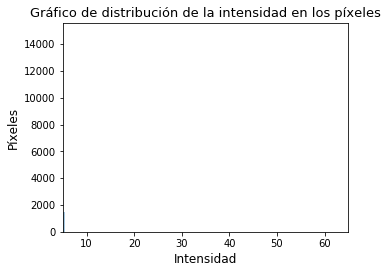

In [238]:
import seaborn as sns

plt.figure(figsize=(6.4*0.8, 4.8*0.8))

sns.distplot(gray_image.flatten(), kde=False)
plt.title('Gráfico de distribución de la intensidad en los píxeles',fontsize=13)
plt.ylabel('Píxeles', fontsize=12)
plt.xlabel('Intensidad', fontsize=12)
plt.xlim([5, 65])

plt.show()

### A) Threshold

### 1. Threshold Adaptativo

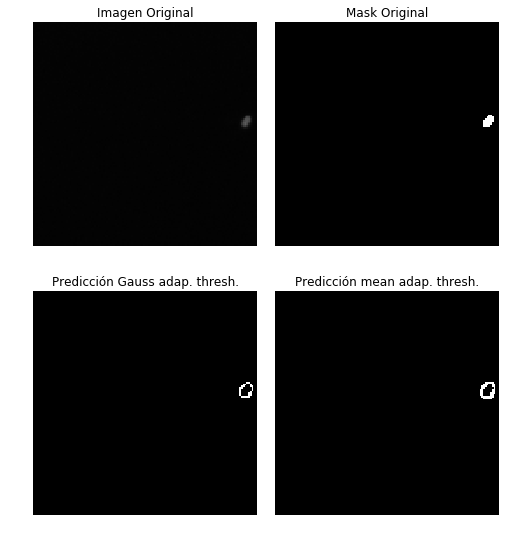

In [239]:
#Threshold Adaptativo
adaptative_gaussian=cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,5)
adaptative_mean=cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)
if(np.sum(adaptative_gaussian==255)>np.sum(adaptative_gaussian==0)):
        adaptative_gaussian=cv2.bitwise_not(adaptative_gaussian)

if(np.sum(adaptative_mean==255)>np.sum(adaptative_mean==0)):
        adaptative_mean=cv2.bitwise_not(adaptative_mean)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplots_adjust(wspace=0.0005, hspace=0.2, bottom = 0.1, top = 1.050, left = 0.1, right = 0.8) 
plt.subplot(2,2,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(adaptative_gaussian, cmap='gray')
plt.title('Predicción Gauss adap. thresh.')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(adaptative_mean, cmap='gray')
plt.title('Predicción mean adap. thresh.')
plt.axis('off')

plt.show()

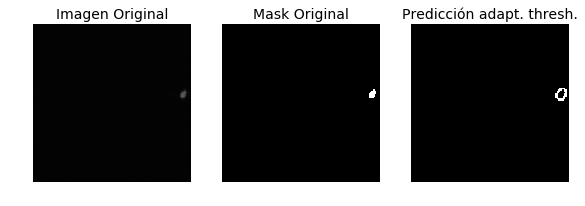

In [240]:
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original',fontsize=14 )
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(adaptative_mean, cmap='gray')
plt.title('Predicción adapt. thresh.',fontsize=14)
plt.axis('off')

plt.show()

In [241]:
labels,nlabels=ndimage.label(adaptative_gaussian)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y ', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 4 nuclei distintos, de 1 que se detectan en el original y  1 que detecta el experto.

El resultado se ha desviado -3 unidades.


In [242]:
labels,nlabels=ndimage.label(adaptative_mean)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de 1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


### 2. Threshold de Otsu

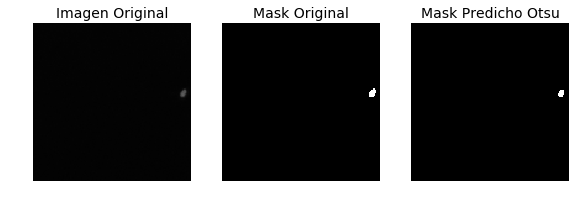

In [243]:
val1, otsu1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
if(np.sum(otsu1==255)>np.sum(otsu1==0)):
        otsu1=cv2.bitwise_not(otsu1)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original', fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(otsu1, cmap='gray')
plt.title('Mask Predicho Otsu',fontsize=14)
plt.axis('off')

plt.show()

In [244]:
labels,nlabels=ndimage.label(otsu1)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de 1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


### 3. Threshold Otsu tras filtro Gaussiano

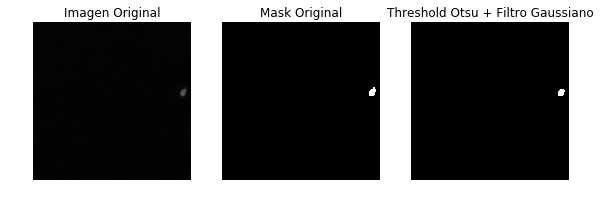

In [245]:
# Otsu's thresholding after Gaussian filtering
val3,gaus_otsu = cv2.threshold(gaus_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
if(np.sum(gaus_otsu==255)>np.sum(gaus_otsu==0)):
        gaus_otsu=cv2.bitwise_not(gaus_otsu)


plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaus_otsu, cmap='gray')
plt.title('Threshold Otsu + Filtro Gaussiano')
plt.axis('off')

plt.show()

In [246]:
labels,nlabels=ndimage.label(gaus_otsu)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de 1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


### I- Comparación de Thresholds

Para ver las diferencias entre los thresholds, se comparan los píxeles de las imágenes obtenidas tras cada filtro y se divide por el total de píxeles de la imagen.

#### Adaptativo vs Otsu

In [247]:
sum((adaptative_gaussian==otsu1).flatten())/(original_image.shape[0]*original_image.shape[1])

0.9969482421875

#### Adaptativo vs Otsu tras filtro Gaussiano

In [248]:
sum((adaptative_gaussian==gaus_otsu).flatten())/(original_image.shape[0]*original_image.shape[1])

0.99676513671875

#### Otsu vs Otsu tras filtro Gaussiano

In [249]:
sum((gaus_otsu==otsu1).flatten())/(original_image.shape[0]*original_image.shape[1])

0.99969482421875

#### Gráficos

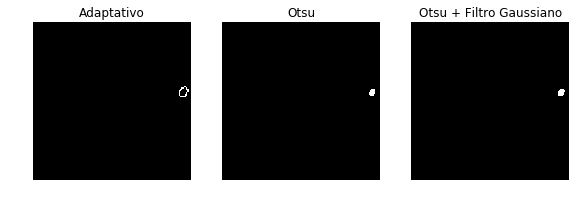

In [250]:
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(adaptative_gaussian, cmap='gray')
plt.title('Adaptativo')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(otsu1, cmap='gray')
plt.title('Otsu')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaus_otsu, cmap='gray')
plt.title('Otsu + Filtro Gaussiano')
plt.axis('off')

plt.show()

### B) K-means

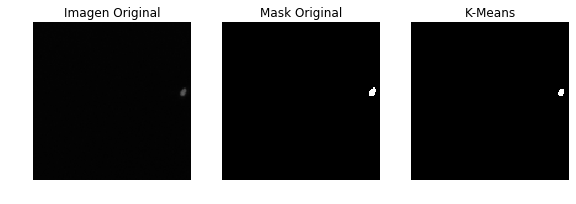

In [251]:
from sklearn.cluster import KMeans
#Número de clusters
K=2 

#Conversión a un array de 2 dimensiones para fit (length*width, channels=1)
gray_image_2d = gray_image.reshape(gray_image.shape[0]*gray_image.shape[1],1)

kmeans_modelo=KMeans(n_clusters=K)
kmeans = kmeans_modelo.fit(gray_image_2d)

kmeans_labels = kmeans.labels_

if (list(kmeans_labels).count(0)<list(kmeans_labels).count(1)):
    kmeans_labels = np.where(kmeans_labels, 1 - kmeans_labels, 1 - kmeans_labels)

#Reshape a las dimensiones de la imagen original en blanco y negro
kmeans_image = kmeans_labels.reshape(gray_image.shape)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image,cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(kmeans_image,cmap='gray')
plt.title('K-Means')
plt.axis('off')

plt.show()

In [252]:
labels,nlabels=ndimage.label(kmeans_image)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de 1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


#### Comparación: K-Means vs Threshold de Otsu

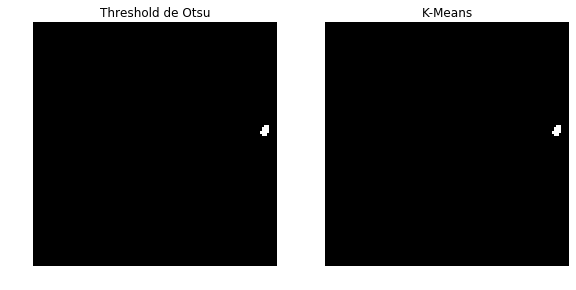

In [253]:
#Gráfico
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,2,1)
plt.imshow(otsu1, cmap='gray')
plt.title('Threshold de Otsu')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(kmeans_image,cmap='gray')
plt.title('K-Means')
plt.axis('off')

plt.show()

In [254]:
sum((kmeans_image==otsu1).flatten())/(original_image.shape[0]*original_image.shape[1])

0.99859619140625

###  C) Transformaciones Morfológicas

In [255]:
#Definición del Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))

#Erosión + Dilatación
morph_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

#Binarización
value_th, img_th = cv2.threshold(morph_image,0,255,cv2.THRESH_OTSU)
#Erosión + Dilatación 2
morph_image_2=cv2.morphologyEx(img_th, cv2.MORPH_OPEN, kernel)

#Aplicar color a cada componente separado
cc=cv2.connectedComponents(morph_image_2)[1]

if(np.sum(morph_image_2==255)>np.sum(morph_image_2==0)):
        morph_image_2=cv2.bitwise_not(morph_image_2)

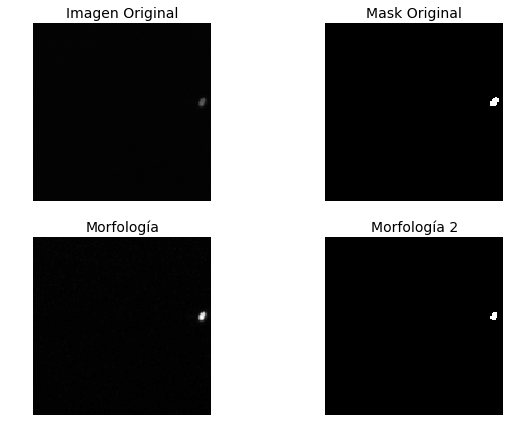

In [256]:
#Mostrar los pasos
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(2,2,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(mask_original_image,cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(morph_image,cmap='gray')
plt.title('Morfología', fontsize=14)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(morph_image_2,cmap='gray')
plt.title('Morfología 2',fontsize=14)
plt.axis('off')

plt.show()

### Resultado

In [257]:
labels,nlabels=ndimage.label(morph_image_2)
print('Se han detectado',nlabels,'nuclei distintos, de', nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de 1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


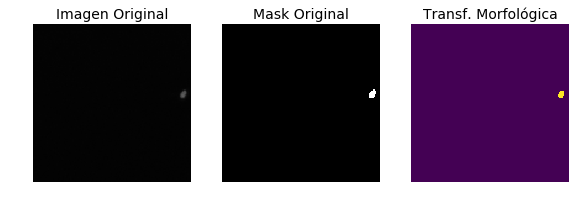

In [258]:
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image,cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cc)
plt.title('Transf. Morfológica',fontsize=14)
plt.axis('off')

plt.show()

### D) Canny Edge Detector

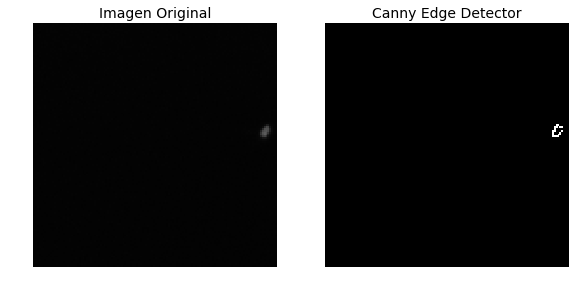

In [259]:
edges = cv2.Canny(image = gaus_blur_2, threshold1 = 0,threshold2 = val1)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title('Imagen Original', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title('Canny Edge Detector',fontsize=14)
plt.axis('off')

plt.show()

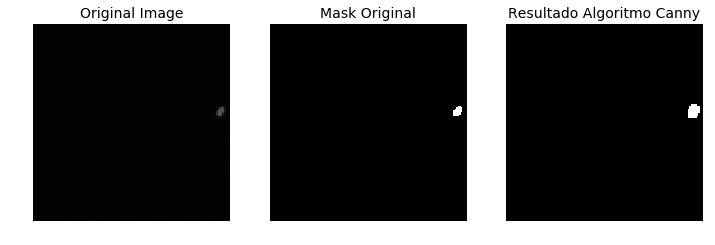

In [260]:
#Filtro inicial para completar los círculos y eliminar ruido
blur2 = cv2.GaussianBlur(edges,(3,3),0)
#Devuelve una lista de contornos que ha encontrado
canny_cont=cv2.findContours(blur2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Original Image', fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

#Rellenar los bordes encontrados
background=np.zeros(gray_image.shape) #Nueva matriz porque superpone los resultados
canny_mask=cv2.drawContours(background,canny_cont,-1,255,-1) # -1--> todos los contornos

plt.subplot(1,3,3)
plt.imshow(canny_mask,cmap='gray')
plt.title('Resultado Algoritmo Canny',fontsize=14)
plt.axis('off')

plt.show()

In [261]:
from scipy import ndimage
labels,nlabels=ndimage.label(canny_mask)
print('Se han detectado',nlabels,'nuclei distintos, de ',nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 1 nuclei distintos, de  1 que se detectan en el original y 1 que detecta el experto.

El resultado se ha desviado 0 unidades.


### E) Watershed

#### Sobel Filter

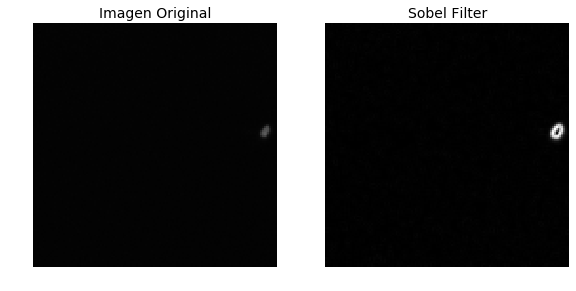

In [262]:
image_astype = gray_image.astype('int32')
derivative_x = ndimage.sobel(image_astype, 0)
derivative_y = ndimage.sobel(image_astype, 1)
magnitude = np.hypot(derivative_x, derivative_y)
# Normalización
magnitude *= 255.0 / np.max(magnitude) 

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title('Imagen Original', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude,cmap='gray')
plt.title('Sobel Filter',fontsize=14)
plt.axis('off')
plt.show()

#### Laplacian Filter

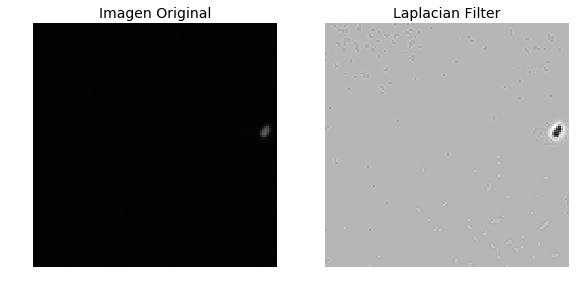

In [263]:
blur = cv2.GaussianBlur(gray_image,(3,3),0)

laplacian = cv2.Laplacian(blur,cv2.CV_64F)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian Filter',fontsize=14)
plt.axis('off')
plt.show()

#### Watershed combinado

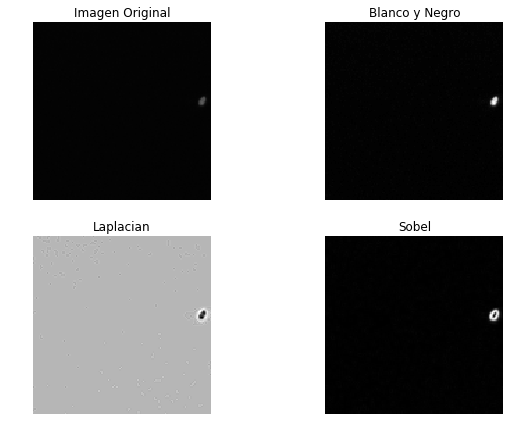

In [264]:
#Gráficos iniciales

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(original_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title('Blanco y Negro')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.show()

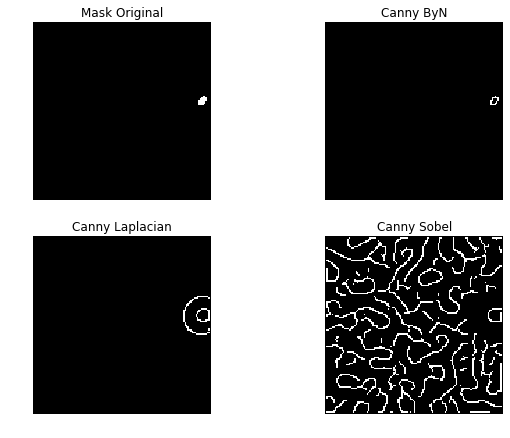

In [265]:
from skimage import feature

edges_gray=feature.canny(gray_image, sigma=0.1)     #3???????????

edges_laplacian=feature.canny(laplacian, sigma=5)

edges_sobel=feature.canny(magnitude, sigma=4)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edges_gray, cmap='gray')
plt.title('Canny ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(edges_laplacian, cmap='gray')
plt.title('Canny Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Canny Sobel')
plt.axis('off')

plt.show()

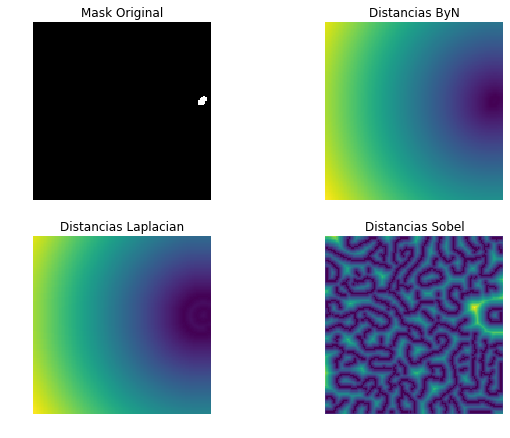

In [266]:
#Distancias a los bordes
from scipy.ndimage import distance_transform_edt

dt1= distance_transform_edt(~edges_gray)
dt2= distance_transform_edt(~edges_laplacian)
dt3= distance_transform_edt(~edges_sobel)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(dt1)
plt.title('Distancias ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(dt2)
plt.title('Distancias Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(dt3)
plt.title('Distancias Sobel')
plt.axis('off')

plt.show()

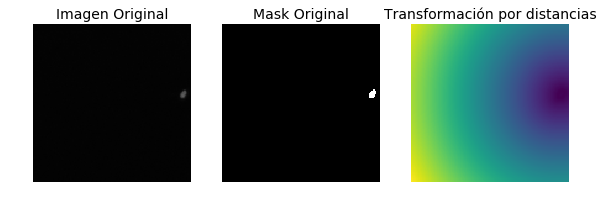

In [267]:
############## CELDA CREADA PARA SACAR IMÁGENES PARA LA MEMORIA ##############

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title('Imagen Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(dt1)
plt.title('Transformación por distancias',fontsize=14)
plt.axis('off')

plt.show()

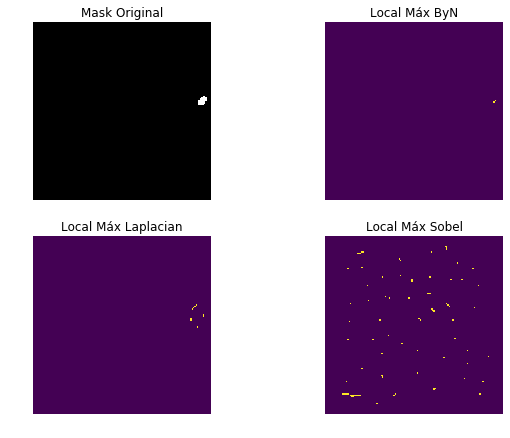

In [268]:
#Máximos locales
local_max1=feature.peak_local_max(dt1, indices=False, min_distance=1)
local_max2=feature.peak_local_max(dt2, indices=False, min_distance=5)
local_max3=feature.peak_local_max(dt3, indices=False, min_distance=7)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(local_max1)
plt.title('Local Máx ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(local_max2)
plt.title('Local Máx Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(local_max3)
plt.title('Local Máx Sobel')
plt.axis('off')

plt.show()

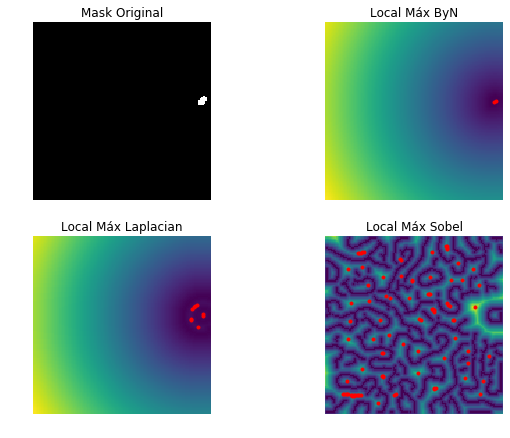

In [269]:
#Mapa de distancias y máximos locales en la misma imagen

#Array de los máximos locales
peak_idx1 = feature.peak_local_max(dt1, indices=True, min_distance=1)
peak_idx2 = feature.peak_local_max(dt2, indices=True, min_distance=5)
peak_idx3 = feature.peak_local_max(dt3, indices=True, min_distance=7)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(peak_idx1[:,1], peak_idx1[:,0], 'r.')
plt.imshow(dt1)
plt.title('Local Máx ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(peak_idx2[:,1], peak_idx2[:,0], 'r.')
plt.imshow(dt2)
plt.title('Local Máx Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(peak_idx3[:,1], peak_idx3[:,0], 'r.')
plt.imshow(dt3)
plt.title('Local Máx Sobel')
plt.axis('off')

plt.show()

In [270]:
from skimage import measure

markers1 = measure.label(local_max1)
markers2 = measure.label(local_max2)
markers3 = measure.label(local_max3)

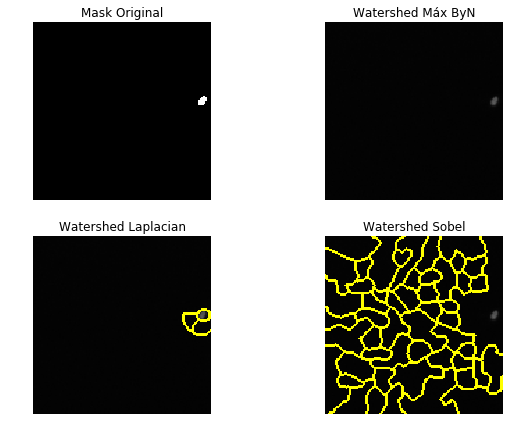

In [271]:
#Watershed
from skimage import morphology, segmentation

labels1 = morphology.watershed(-dt1, markers1)
labels2 = morphology.watershed(-dt2, markers2)
labels3 = morphology.watershed(-dt3, markers3)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(segmentation.mark_boundaries(gray_image, labels1))
plt.title('Watershed Máx ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(segmentation.mark_boundaries(gray_image, labels2))
plt.title('Watershed Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(segmentation.mark_boundaries(gray_image, labels3))
plt.title('Watershed Sobel')
plt.axis('off')

plt.show()

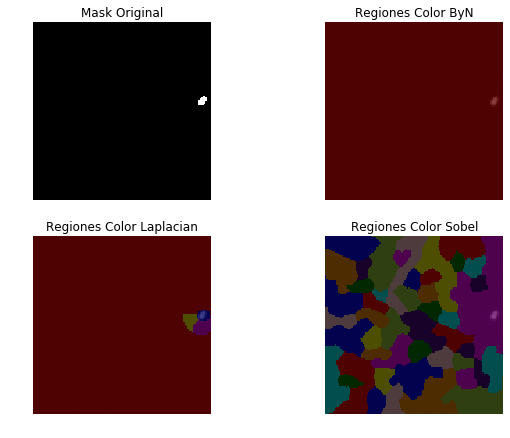

In [272]:
from skimage import color

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(color.label2rgb(labels1, image=gray_image))
plt.title('Regiones Color ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(color.label2rgb(labels2, image=gray_image))
plt.title('Regiones Color Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(color.label2rgb(labels3, image=gray_image))
plt.title('Regiones Color Sobel')
plt.axis('off')

plt.show()

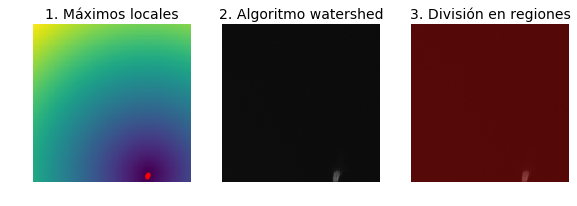

In [228]:
############## CELDA CREADA PARA SACAR IMÁGENES PARA LA MEMORIA ##############

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.plot(peak_idx1[:,1], peak_idx1[:,0], 'r.')
plt.imshow(dt1)
plt.title('1. Máximos locales',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(segmentation.mark_boundaries(gray_image, labels1))
plt.title('2. Algoritmo watershed',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(color.label2rgb(labels1, image=gray_image))
plt.title('3. División en regiones',fontsize=14)
plt.axis('off')

plt.show()

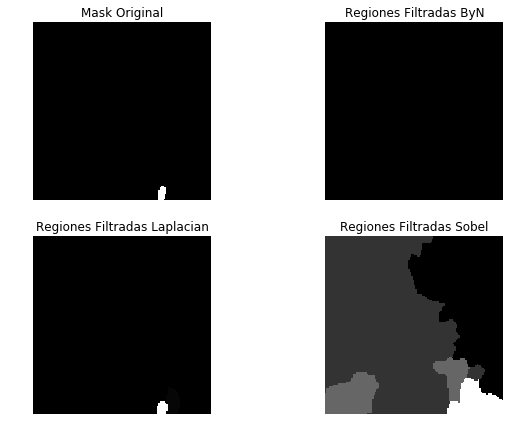

In [229]:
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(color.label2rgb(labels1, image=gray_image, kind='avg'), cmap='gray')
plt.title('Regiones Filtradas ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(color.label2rgb(labels2, image=gray_image, kind='avg'), cmap='gray')
plt.title('Regiones Filtradas Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(color.label2rgb(labels3, image=gray_image, kind='avg'), cmap='gray')
plt.title('Regiones Filtradas Sobel')
plt.axis('off')

plt.show()

In [168]:
#Deberíamos ser capaces de separar background y foreground con intensidades
regions1=measure.regionprops(labels1, intensity_image=gray_image)
regions2=measure.regionprops(labels2, intensity_image=gray_image)
regions3=measure.regionprops(labels3, intensity_image=gray_image)

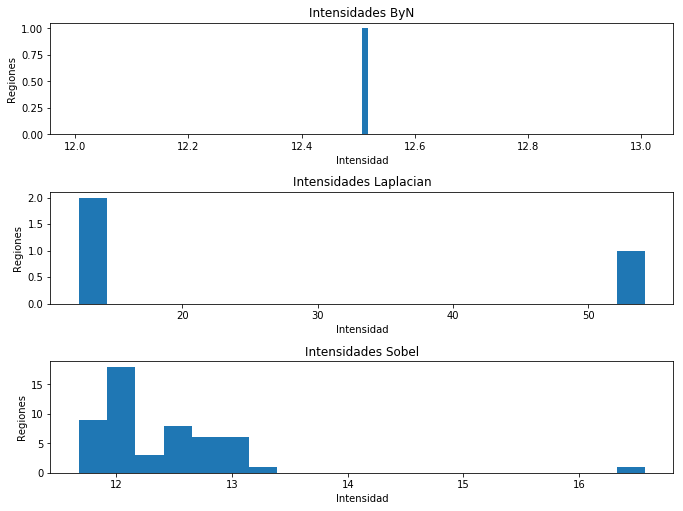

In [173]:
#Relación entre regiones y su intensidad
region_means1 = [r.mean_intensity for r in regions1]
region_means2 = [r.mean_intensity for r in regions2]
region_means3 = [r.mean_intensity for r in regions3]

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(3,1,1)
plt.hist(region_means1, bins=20)
plt.title('Intensidades ByN')
plt.xlabel('Intensidad')
plt.ylabel('Regiones')

plt.subplot(3,1,2)
plt.hist(region_means2, bins=20)
plt.title('Intensidades Laplacian')
plt.xlabel('Intensidad')
plt.ylabel('Regiones')

plt.subplot(3,1,3)
plt.hist(region_means3, bins=20)
plt.title('Intensidades Sobel')
plt.xlabel('Intensidad')
plt.ylabel('Regiones')

plt.tight_layout()

plt.show()

Se puede observar la separación entre objetos pertenecientes a background y los pertenecientes a foreground.

In [170]:
#KMeans tomará la decisión de lo que es background y foreground para cada imagen

model1=KMeans(n_clusters=2)
model2=KMeans(n_clusters=2)
model3=KMeans(n_clusters=2)

#Formato columna
region_means1 = np.array(region_means1).reshape(-1,1)
region_means2 = np.array(region_means2).reshape(-1,1)
region_means3 = np.array(region_means3).reshape(-1,1)

model1.fit(region_means1)
model2.fit(region_means2)
model3.fit(region_means3)

#Mostramoslos centroides encontrados para las 2 clases
print('Coordenadas de los centroides para la Imagen ByN:')
print(model1.cluster_centers_)

#Mostramoslos centroides encontrados para las 2 clases
print('\nCoordenadas de los centroides para la Imagen Laplacian:')
print(model2.cluster_centers_)

#Mostramoslos centroides encontrados para las 2 clases
print('\nCoordenadas de los centroides para la Imagen Sobel:')
print(model3.cluster_centers_)

ValueError: n_samples=1 should be >= n_clusters=2

In [63]:
#Predicciones
bg_fg_labels1 = model1.predict(region_means1)
bg_fg_labels2 = model2.predict(region_means2)
bg_fg_labels3 = model3.predict(region_means3)

In [64]:
#Clasificación en background - foreground
classified_labels1 = labels1.copy()
classified_labels2 = labels2.copy()
classified_labels3 = labels3.copy()

for bg_fg1, region1 in zip(bg_fg_labels1, regions1):
    classified_labels1[tuple(region1.coords.T)] = bg_fg1
    
for bg_fg2, region2 in zip(bg_fg_labels2, regions2):
    classified_labels2[tuple(region2.coords.T)] = bg_fg2
    
for bg_fg3, region3 in zip(bg_fg_labels3, regions3):
    classified_labels3[tuple(region3.coords.T)] = bg_fg3

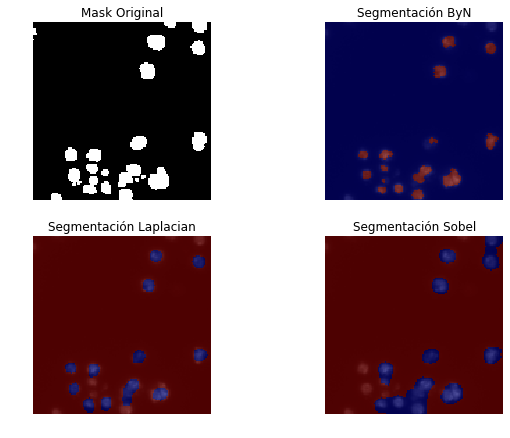

In [65]:
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(color.label2rgb(classified_labels1, image=gray_image))
plt.title('Segmentación ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(color.label2rgb(classified_labels2, image=gray_image))
plt.title('Segmentación Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(color.label2rgb(classified_labels3, image=gray_image))
plt.title('Segmentación Sobel')
plt.axis('off')

plt.show()

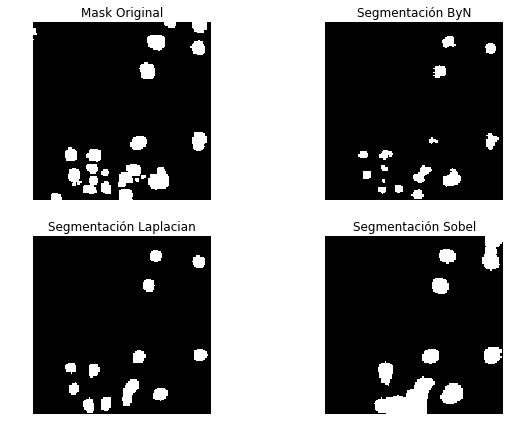

In [66]:
mask_gray1 = np.where(classified_labels1 > 0, 1, 0)
mask_laplacian1=np.where(classified_labels2 > 0, 1, 0)
mask_sobel1=np.where(classified_labels3 > 0, 1, 0)

#Asegurar que background es negro y foreground es blanco a pesar del random de KMeans
if (np.count_nonzero(mask_gray1 == 0)<np.count_nonzero(mask_gray1 == 1)):
    mask_gray1 = np.where(mask_gray1, 1 - mask_gray1, 1 - mask_gray1)
    
    
if (np.count_nonzero(mask_laplacian1 == 0)<np.count_nonzero(mask_laplacian1 == 1)):
    mask_laplacian1 = np.where(mask_laplacian1, 1 - mask_laplacian1, 1 - mask_laplacian1)
    
if (np.count_nonzero(mask_sobel1 == 0)<np.count_nonzero(mask_sobel1 == 1)):
    mask_sobel1 = np.where(mask_sobel1, 1 - mask_sobel1, 1 - mask_sobel1)

plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(2,2,1)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(mask_gray1, cmap='gray')
plt.title('Segmentación ByN')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(mask_laplacian1, cmap='gray')
plt.title('Segmentación Laplacian')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(mask_sobel1, cmap='gray')
plt.title('Segmentación Sobel')
plt.axis('off')

plt.show()

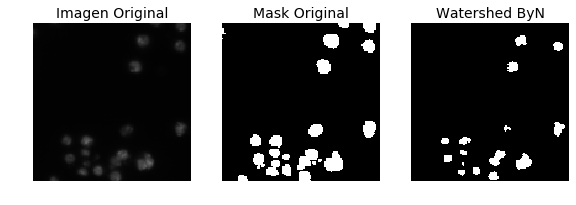

In [67]:
#######FINES VISUALES PARA LA MEMORIA #################
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.title('Imagen Original', fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_original_image, cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_gray1, cmap='gray')
plt.title('Watershed ByN',fontsize=14)
plt.axis('off')

plt.show()

In [68]:
from scipy import ndimage
labels,nlabels=ndimage.label(mask_gray1)
print('Se han detectado',nlabels,'nuclei distintos, de ',nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 15 nuclei distintos, de  22 que se detectan en el original y 27 que detecta el experto.

El resultado se ha desviado 7 unidades.


In [69]:
from scipy import ndimage
labels,nlabels=ndimage.label(mask_laplacian1)
print('Se han detectado',nlabels,'nuclei distintos, de ',nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 12 nuclei distintos, de  22 que se detectan en el original y 27 que detecta el experto.

El resultado se ha desviado 10 unidades.


In [70]:
from scipy import ndimage
labels,nlabels=ndimage.label(mask_sobel1)
print('Se han detectado',nlabels,'nuclei distintos, de ',nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 8 nuclei distintos, de  22 que se detectan en el original y 27 que detecta el experto.

El resultado se ha desviado 14 unidades.


# Deep Learning y RRNN

Se plantean la opción de crear una red de estructura U-Net a la hora de realizar la segmentación a través del Deep Learning y las RRNN.

In [1327]:
#Librerías
from keras import backend as K

from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.core import Dropout
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

from keras.layers import Input
from keras.layers.core import Lambda
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

from keras.models import load_model

Using TensorFlow backend.


# Estructura U-Net

# 1) UNet 1 - Simplificada

Primera aproximación de la red con estructura UNet, donde introducimos 2 capas de contracción y 2 de expansión.

In [275]:
#Definir las etapas del modelo
from keras import backend as K

from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.core import Dropout
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def bloque_1_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding='same'):
    #Bloque de contracción
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(c)
    p = MaxPooling2D((2, 2))(c)
    return c, p

def bloque_2_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding="same"):
    #Bloque medio
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

def bloque_3_UNet(x, skip, filters, dropout_val, kernel_size=(3, 3), padding="same", strides=(2, 2)):
    #Bloque de expasión
    up = Conv2DTranspose(filters, (2, 2), strides= strides, padding=padding)(x)
    up = concatenate([up, skip])
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(up)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

Using TensorFlow backend.


In [276]:
#Crear modelo
from keras.layers import Input
from keras.layers.core import Lambda
from keras.models import Model


def UNet():
    f = [16, 32, 64, 128, 256, 512, 1024]
    d = [0.1, 0.2, 0.3]
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    s0 = Lambda(lambda x: x / 255) (inputs)
    
    c1, p1 = bloque_1_UNet(s0, f[2], d[1]) #32 -> 16
    c2, p2 = bloque_1_UNet(p1, f[3], d[1]) #16->8
    
    b2 = bloque_2_UNet(p2, f[4], d[2])
    
    u2 = bloque_3_UNet(b2, c2, f[3], d[1]) #32 -> 64
    u1 = bloque_3_UNet(u2, c1, f[2], d[1]) #64 -> 128
    
    outputs = Conv2D(1, (1, 1), activation="sigmoid")(u1)
    
    model_unet = Model(inputs=[inputs], outputs=[outputs])
    return model_unet

In [277]:
#Compilar modelo
warnings.simplefilter("ignore", UserWarning)

modelo_Unet_1 = UNet()
modelo_Unet_1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
modelo_Unet_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 1792        lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)  

In [221]:
#############################################################
####################### Entrenamiento #######################
#############################################################
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

warnings.simplefilter("ignore", UserWarning)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tfm2019-Unet1.h5', verbose=1, save_best_only=True)
results_tfm2019_Unet1 = modelo_Unet_1.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose = 0)

Instructions for updating:
Use tf.cast instead.



Epoch 00001: val_loss improved from inf to 0.20853, saving model to model-tfm2019-Unet1.h5



Epoch 00002: val_loss improved from 0.20853 to 0.13313, saving model to model-tfm2019-Unet1.h5



Epoch 00003: val_loss improved from 0.13313 to 0.10253, saving model to model-tfm2019-Unet1.h5



Epoch 00004: val_loss improved from 0.10253 to 0.09001, saving model to model-tfm2019-Unet1.h5



Epoch 00005: val_loss improved from 0.09001 to 0.08893, saving model to model-tfm2019-Unet1.h5



Epoch 00006: val_loss improved from 0.08893 to 0.08371, saving model to model-tfm2019-Unet1.h5



Epoch 00007: val_loss improved from 0.08371 to 0.07773, saving model to model-tfm2019-Unet1.h5



Epoch 00008: val_loss did not improve from 0.07773



Epoch 00009: val_loss did not improve from 0.07773



Epoch 00010: val_loss improved from 0.07773 to 0.07278, saving model to model-tfm2019-Unet1.h5



Epoch 00011: val_loss did not improve from 0.07278



Epoch 00012: val_loss did not improve from 0.07278



Epoch 00013: val_loss improved from 0.07278 to 0.07115, saving model to model-tfm2019-Unet1.h5



Epoch 00014: val_loss did not improve from 0.07115



Epoch 00015: val_loss did not improve from 0.07115



Epoch 00016: val_loss improved from 0.07115 to 0.07046, saving model to model-tfm2019-Unet1.h5



Epoch 00017: val_loss did not improve from 0.07046



Epoch 00018: val_loss did not improve from 0.07046



Epoch 00019: val_loss did not improve from 0.07046



Epoch 00020: val_loss improved from 0.07046 to 0.06836, saving model to model-tfm2019-Unet1.h5



Epoch 00021: val_loss did not improve from 0.06836



Epoch 00022: val_loss did not improve from 0.06836



Epoch 00023: val_loss improved from 0.06836 to 0.06801, saving model to model-tfm2019-Unet1.h5



Epoch 00024: val_loss improved from 0.06801 to 0.06545, saving model to model-tfm2019-Unet1.h5



Epoch 00025: val_loss improved from 0.06545 to 0.06493, saving model to model-tfm2019-Unet1.h5



Epoch 00026: val_loss did not improve from 0.06493



Epoch 00027: val_loss did not improve from 0.06493



Epoch 00028: val_loss improved from 0.06493 to 0.06340, saving model to model-tfm2019-Unet1.h5



Epoch 00029: val_loss did not improve from 0.06340



Epoch 00030: val_loss did not improve from 0.06340



Epoch 00031: val_loss did not improve from 0.06340



Epoch 00032: val_loss did not improve from 0.06340



Epoch 00033: val_loss did not improve from 0.06340
Epoch 00033: early stopping



In [222]:
#############################################################
################### Guardado de resultados ##################
#############################################################
unet1_df = pd.DataFrame(results_tfm2019_Unet1.history)

with open('Training_History/unet-1-history.csv', mode='w') as f:
    unet1_df.to_csv(f)

In [278]:
#Cargar los resultados del entrenamiento
unet1_csv = pd.read_csv('Training_History/unet-1-history.csv')

#Cambiamos el nombre de la primera columna para aclarar que se refiere a las épocas
unet1_csv.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)

print(unet1_csv)

    epoch  val_loss   val_acc      loss       acc
0       0  0.208526  0.881431  0.445292  0.828770
1       1  0.133126  0.947031  0.209819  0.899182
2       2  0.102529  0.959985  0.119097  0.954581
3       3  0.090010  0.962884  0.103124  0.960159
4       4  0.088928  0.966287  0.089138  0.965405
5       5  0.083712  0.967824  0.089435  0.965284
6       6  0.077727  0.969517  0.081577  0.968615
7       7  0.084844  0.966079  0.079528  0.968749
8       8  0.079835  0.968521  0.077851  0.969546
9       9  0.072776  0.970108  0.079046  0.969627
10     10  0.073352  0.970364  0.075095  0.970819
11     11  0.075483  0.969936  0.073812  0.971189
12     12  0.071151  0.970971  0.073496  0.971150
13     13  0.074555  0.969706  0.073395  0.971114
14     14  0.072250  0.970033  0.072837  0.971665
15     15  0.070464  0.970597  0.070850  0.972191
16     16  0.079988  0.967460  0.073054  0.971464
17     17  0.075287  0.970592  0.074781  0.970619
18     18  0.070738  0.971692  0.070461  0.972439


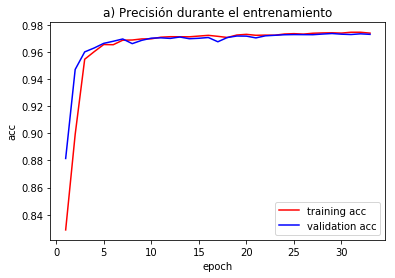

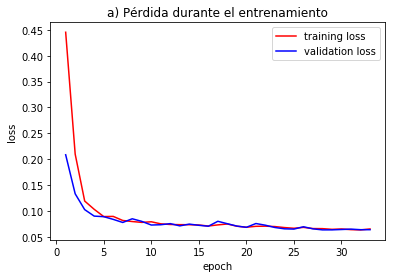

In [279]:
#Gráficas durante el entrenamiento

# Gráfica de precisión
epochs = np.arange(1,len(unet1_csv['acc'])+1)
plt.title('a) Precisión durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(epochs,unet1_csv['acc'],'r',label='training acc')
plt.plot(epochs,unet1_csv['val_acc'],'b',label='validation acc')
plt.legend(loc='best')

plt.show()

# Gráfica de pérdida
epochs = np.arange(1,len(unet1_csv['acc'])+1)
plt.title('a) Pérdida durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,unet1_csv['loss'],'r',label='training loss')
plt.plot(epochs,unet1_csv['val_loss'],'b',label='validation loss')
plt.legend(loc='best')

plt.show()

In [280]:
# Predict on train, val and test
from keras.models import load_model

model = load_model('model-tfm2019-Unet1.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

Instructions for updating:
Use tf.cast instead.
65/65 [==============================] - ETA:  - ETA:  - 17s 255ms/step


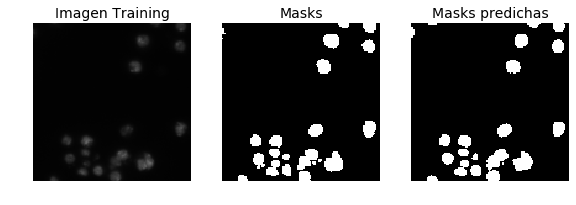

In [290]:
#Perform a sanity check on some training samples

m = 0

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[m])
plt.title('Imagen Training', fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[m]), cmap='gray')
plt.title('Masks',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_train_t[m]), cmap='gray')
plt.title('Masks predichas',fontsize=14)
plt.axis('off')

plt.show()

In [282]:
labels,nlabels=ndimage.label(np.squeeze(preds_train_t[m]))
print('Se han detectado',nlabels,'nuclei distintos, de ',nlabels_mask,'que se detectan en el original y', numero_masks,'que detecta el experto.')
desv= nlabels_mask-nlabels
print('\nEl resultado se ha desviado',desv ,'unidades.')

Se han detectado 20 nuclei distintos, de  19 que se detectan en el original y 24 que detecta el experto.

El resultado se ha desviado -1 unidades.


In [291]:
######### AÑADIR AL DATAFRAME DE RESULTADOS GLOBALES ###################

UNET1=[]

for a in range(len(preds_train)):
    labels,nlabels=ndimage.label(np.squeeze(preds_train_t[a]))
    UNET1.append(nlabels)


for a in range(len(preds_val)):
    labels,nlabels=ndimage.label(np.squeeze(preds_val_t[a]))
    UNET1.append(nlabels)

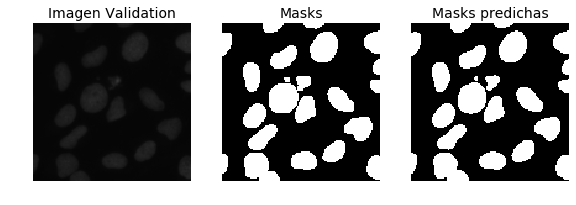

In [1343]:
#Perform a sanity check on some validation samples

l=26

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][l])
plt.title('Imagen Validation',fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][l]), cmap='gray')
plt.title('Masks',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_val_t[l]), cmap='gray')
plt.title('Masks predichas',fontsize=14)
plt.axis('off')

plt.show()

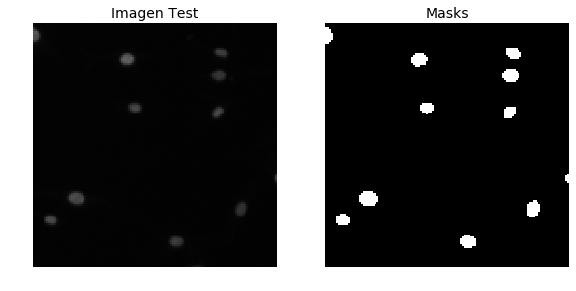

In [1355]:
#Probar con algunas imágenes de test
plt.figure(figsize=(6.4*1.5, 4.8*1.5))

b = 18

plt.subplot(1,2,1)
plt.imshow(X_test[b])
plt.title('Imagen Test', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(preds_test_t[b]), cmap='gray')
plt.title('Masks', fontsize=14)
plt.axis('off')

plt.show()

## 2) UNet 2 - completa

Estructura que cumple con la original, salvo por el número de filtros que ha sido reducido para hacernos una idea de los resultados.

In [294]:
#Definir las etapas del modelo
def bloque_1_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding='same'):
    #Bloque de contracción
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(c)
    p = MaxPooling2D((2, 2))(c)
    return c, p

def bloque_2_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding="same"):
    #Bloque medio
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

def bloque_3_UNet(x, skip, filters, dropout_val, kernel_size=(3, 3), padding="same", strides=(2, 2)):
    #Bloque de expasión
    up = Conv2DTranspose(filters, (2, 2), strides= strides, padding=padding)(x)
    up = concatenate([up, skip])
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(up)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

In [295]:
#Crear modelo
def UNet():
    f = [16, 32, 64, 128, 256]
    d = [0.1, 0.2, 0.3]
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    s0 = Lambda(lambda x: x / 255) (inputs)
    
    c1, p1 = bloque_1_UNet(s0, f[0], d[0]) #128 -> 64
    c2, p2 = bloque_1_UNet(p1, f[1], d[0]) #64 -> 32
    c3, p3 = bloque_1_UNet(p2, f[2], d[1]) #32 -> 16
    c4, p4 = bloque_1_UNet(p3, f[3], d[1]) #16->8
    
    b2 = bloque_2_UNet(p4, f[4], d[2])
    
    u1 = bloque_3_UNet(b2, c4, f[3], d[1]) #8 -> 16
    u2 = bloque_3_UNet(u1, c3, f[2], d[1]) #16 -> 32
    u3 = bloque_3_UNet(u2, c2, f[1], d[0]) #32 -> 64
    u4 = bloque_3_UNet(u3, c1, f[0], d[0]) #64 -> 128
    
    outputs = Conv2D(1, (1, 1), activation="sigmoid")(u4)
    
    model_unet = Model(inputs=[inputs], outputs=[outputs])
    return model_unet

In [296]:
#Compilar modelo
warnings.simplefilter("ignore", UserWarning)

modelo_Unet_2 = UNet()
modelo_Unet_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
modelo_Unet_2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 128, 128, 16) 0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 

__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 128, 128, 16) 4624        concatenate_6[0][0]              
__________________________________________________________________________________________________
dropout_14 (Dropout)            (None, 128, 128, 16) 0           conv2d_28[0][0]                  
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 128, 128, 16) 2320        dropout_14[0][0]                 
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 128, 128, 1)  17          conv2d_29[0][0]                  
Total params: 1,941,105
Trainable params: 1,941,105
Non-trainable params: 0
__________________________________________________________________________________________________


In [196]:
#############################################################
####################### Entrenamiento #######################
#############################################################
warnings.simplefilter("ignore", UserWarning)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tfm2019-Unet2-1.h5', verbose=1, save_best_only=True)
results_tfm2019_Unet2_1 = modelo_Unet_2.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose = 0)


Epoch 00001: val_loss improved from inf to 0.28508, saving model to model-tfm2019-Unet2-1.h5



Epoch 00002: val_loss improved from 0.28508 to 0.17100, saving model to model-tfm2019-Unet2-1.h5



Epoch 00003: val_loss improved from 0.17100 to 0.12517, saving model to model-tfm2019-Unet2-1.h5



Epoch 00004: val_loss improved from 0.12517 to 0.12320, saving model to model-tfm2019-Unet2-1.h5



Epoch 00005: val_loss improved from 0.12320 to 0.11088, saving model to model-tfm2019-Unet2-1.h5



Epoch 00006: val_loss improved from 0.11088 to 0.10400, saving model to model-tfm2019-Unet2-1.h5



Epoch 00007: val_loss improved from 0.10400 to 0.09487, saving model to model-tfm2019-Unet2-1.h5



Epoch 00008: val_loss did not improve from 0.09487



Epoch 00009: val_loss did not improve from 0.09487



Epoch 00010: val_loss improved from 0.09487 to 0.09188, saving model to model-tfm2019-Unet2-1.h5



Epoch 00011: val_loss did not improve from 0.09188



Epoch 00012: val_loss improved from 0.09188 to 0.09119, saving model to model-tfm2019-Unet2-1.h5



Epoch 00013: val_loss improved from 0.09119 to 0.08587, saving model to model-tfm2019-Unet2-1.h5



Epoch 00014: val_loss improved from 0.08587 to 0.08044, saving model to model-tfm2019-Unet2-1.h5



Epoch 00015: val_loss did not improve from 0.08044



Epoch 00016: val_loss did not improve from 0.08044



Epoch 00017: val_loss improved from 0.08044 to 0.07909, saving model to model-tfm2019-Unet2-1.h5



Epoch 00018: val_loss did not improve from 0.07909



Epoch 00019: val_loss did not improve from 0.07909



Epoch 00020: val_loss did not improve from 0.07909



Epoch 00021: val_loss did not improve from 0.07909



Epoch 00022: val_loss did not improve from 0.07909
Epoch 00022: early stopping


In [197]:
#############################################################
################### Guardado de resultados ##################
#############################################################
unet2_df = pd.DataFrame(results_tfm2019_Unet2_1.history)

with open('Training_History/unet-2-history.csv', mode='w') as f:
    unet2_df.to_csv(f)

In [297]:
#Cargar los resultados del entrenamiento
unet2_csv = pd.read_csv('Training_History/unet-2-history.csv')

#Cambiamos el nombre de la primera columna para aclarar que se refiere a las épocas
unet2_csv.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)

print(unet2_csv)

    epoch  val_loss   val_acc      loss       acc
0       0  0.285082  0.854182  0.525762  0.829800
1       1  0.170998  0.928096  0.255603  0.878950
2       2  0.125167  0.949626  0.163199  0.936206
3       3  0.123200  0.949566  0.128921  0.950910
4       4  0.110876  0.955650  0.113778  0.955985
5       5  0.103996  0.957690  0.101037  0.960881
6       6  0.094865  0.963424  0.101200  0.960812
7       7  0.095976  0.961683  0.102726  0.960696
8       8  0.097620  0.961519  0.095108  0.963587
9       9  0.091881  0.964663  0.093141  0.964003
10     10  0.102003  0.961149  0.096516  0.963040
11     11  0.091187  0.965005  0.094882  0.963700
12     12  0.085867  0.967699  0.091915  0.964626
13     13  0.080442  0.968135  0.086621  0.966589
14     14  0.083592  0.968262  0.086334  0.966648
15     15  0.093345  0.966266  0.082225  0.968008
16     16  0.079092  0.968389  0.087525  0.966306
17     17  0.087413  0.966340  0.083565  0.967803
18     18  0.082119  0.968980  0.081427  0.968255


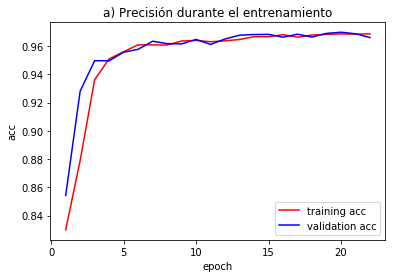

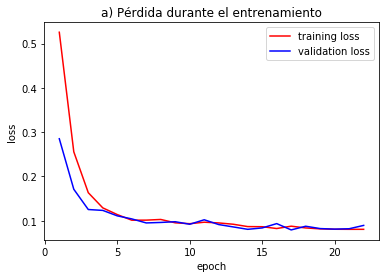

In [298]:
#Gráficas durante el entrenamiento

# Gráfica de precisión
epochs = np.arange(1,len(unet2_csv['acc'])+1)
plt.title('a) Precisión durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(epochs,unet2_csv['acc'],'r',label='training acc')
plt.plot(epochs,unet2_csv['val_acc'],'b',label='validation acc')
plt.legend(loc='best')

plt.show()

# Gráfica de pérdida
epochs = np.arange(1,len(unet2_csv['acc'])+1)
plt.title('a) Pérdida durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,unet2_csv['loss'],'r',label='training loss')
plt.plot(epochs,unet2_csv['val_loss'],'b',label='validation loss')
plt.legend(loc='best')

plt.show()

In [299]:
# Predict on train, val and test
model = load_model('model-tfm2019-Unet2-1.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

65/65 [==============================] - ETA:  - ETA:  - 4s 64ms/step


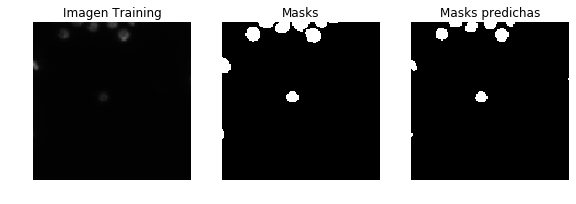

In [300]:
#Perform a sanity check on some training samples

p = 59

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[p])
plt.title('Imagen Training')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[p]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_train_t[p]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

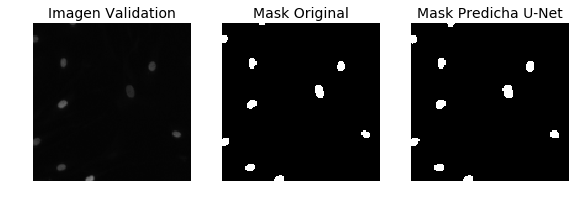

In [301]:
#Perform a sanity check on some validation samples

v = 56

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][v])
plt.title('Imagen Validation', fontsize=14)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][v]), cmap='gray')
plt.title('Mask Original',fontsize=14)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_val_t[v]), cmap='gray')
plt.title('Mask Predicha U-Net',fontsize=14)
plt.axis('off')

plt.show()

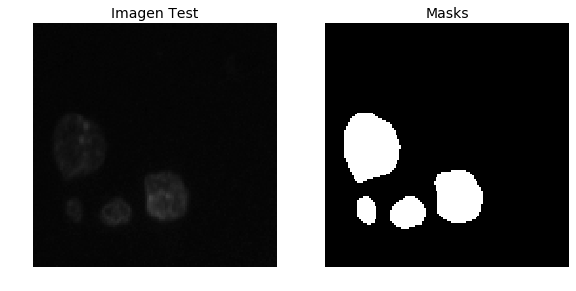

In [302]:
#Probar con algunas imágenes de test

t = 8

plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(X_test[t])
plt.title('Imagen Test',fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(preds_test_t[t]), cmap='gray')
plt.title('Masks', fontsize=14)
plt.axis('off')

plt.show()

In [303]:
######### AÑADIR AL DATAFRAME DE RESULTADOS GLOBALES ###################

UNET2=[]

for a in range(len(preds_train)):
    labels,nlabels=ndimage.label(np.squeeze(preds_train_t[a]))
    UNET2.append(nlabels)


for a in range(len(preds_val)):
    labels,nlabels=ndimage.label(np.squeeze(preds_val_t[a]))
    UNET2.append(nlabels)

# 3) UNet 2_2 - sin dropout

Eliminamos las capas de Dropout que se encuentran entre convoluciones.

In [305]:
#Definir las etapas del modelo
def bloque_1_UNet(x, filters, kernel_size=(3, 3), padding='same'):
    #Bloque de contracción
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(c)
    p = MaxPooling2D((2, 2))(c)
    return c, p

def bloque_2_UNet(x, filters, kernel_size=(3, 3), padding="same"):
    #Bloque medio
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(x)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

def bloque_3_UNet(x, skip, filters, kernel_size=(3, 3), padding="same", strides=(2, 2)):
    #Bloque de expansión
    up = Conv2DTranspose(filters, (2, 2), strides= strides, padding=padding)(x)
    up = concatenate([up, skip])
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(up)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

In [306]:
#Crear modelo
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    s0 = Lambda(lambda x: x / 255) (inputs)
    
    c1, p1 = bloque_1_UNet(s0, f[0]) #128 -> 64
    c2, p2 = bloque_1_UNet(p1, f[1]) #64 -> 32
    c3, p3 = bloque_1_UNet(p2, f[2]) #32 -> 16
    c4, p4 = bloque_1_UNet(p3, f[3]) #16->8
    
    b2 = bloque_2_UNet(p4, f[4])
    
    u1 = bloque_3_UNet(b2, c4, f[3]) #8 -> 16
    u2 = bloque_3_UNet(u1, c3, f[2]) #16 -> 32
    u3 = bloque_3_UNet(u2, c2, f[1]) #32 -> 64
    u4 = bloque_3_UNet(u3, c1, f[0]) #64 -> 128
    
    outputs = Conv2D(1, (1, 1), activation="sigmoid")(u4)
    
    model_unet = Model(inputs=[inputs], outputs=[outputs])
    return model_unet

In [307]:
#Compilar modelo
warnings.simplefilter("ignore", UserWarning)

modelo_Unet_2_2 = UNet()
modelo_Unet_2_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
modelo_Unet_2_2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 128, 128, 16) 448         lambda_3[0][0]                   
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_31[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [207]:
#############################################################
####################### Entrenamiento #######################
#############################################################
warnings.simplefilter("ignore", UserWarning)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tfm2019-Unet2-2.h5', verbose=1, save_best_only=True)
results_tfm2019_Unet2_2 = modelo_Unet_2_2.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose = 0)


Epoch 00001: val_loss improved from inf to 0.34004, saving model to model-tfm2019-Unet2-2.h5



Epoch 00002: val_loss improved from 0.34004 to 0.19109, saving model to model-tfm2019-Unet2-2.h5



Epoch 00003: val_loss improved from 0.19109 to 0.12572, saving model to model-tfm2019-Unet2-2.h5



Epoch 00004: val_loss improved from 0.12572 to 0.11986, saving model to model-tfm2019-Unet2-2.h5



Epoch 00005: val_loss improved from 0.11986 to 0.11309, saving model to model-tfm2019-Unet2-2.h5



Epoch 00006: val_loss improved from 0.11309 to 0.09927, saving model to model-tfm2019-Unet2-2.h5



Epoch 00007: val_loss improved from 0.09927 to 0.09760, saving model to model-tfm2019-Unet2-2.h5



Epoch 00008: val_loss improved from 0.09760 to 0.09389, saving model to model-tfm2019-Unet2-2.h5



Epoch 00009: val_loss improved from 0.09389 to 0.08689, saving model to model-tfm2019-Unet2-2.h5



Epoch 00010: val_loss improved from 0.08689 to 0.08251, saving model to model-tfm2019-Unet2-2.h5



Epoch 00011: val_loss improved from 0.08251 to 0.08232, saving model to model-tfm2019-Unet2-2.h5



Epoch 00012: val_loss improved from 0.08232 to 0.08142, saving model to model-tfm2019-Unet2-2.h5



Epoch 00013: val_loss improved from 0.08142 to 0.07558, saving model to model-tfm2019-Unet2-2.h5



Epoch 00014: val_loss did not improve from 0.07558



Epoch 00015: val_loss did not improve from 0.07558



Epoch 00016: val_loss did not improve from 0.07558



Epoch 00017: val_loss improved from 0.07558 to 0.07309, saving model to model-tfm2019-Unet2-2.h5



Epoch 00018: val_loss did not improve from 0.07309



Epoch 00019: val_loss improved from 0.07309 to 0.07179, saving model to model-tfm2019-Unet2-2.h5



Epoch 00020: val_loss did not improve from 0.07179



Epoch 00021: val_loss did not improve from 0.07179



Epoch 00022: val_loss did not improve from 0.07179



Epoch 00023: val_loss improved from 0.07179 to 0.06815, saving model to model-tfm2019-Unet2-2.h5



Epoch 00024: val_loss did not improve from 0.06815



Epoch 00025: val_loss did not improve from 0.06815



Epoch 00026: val_loss did not improve from 0.06815



Epoch 00027: val_loss did not improve from 0.06815



Epoch 00028: val_loss improved from 0.06815 to 0.06782, saving model to model-tfm2019-Unet2-2.h5



Epoch 00029: val_loss did not improve from 0.06782



Epoch 00030: val_loss did not improve from 0.06782



Epoch 00031: val_loss did not improve from 0.06782



Epoch 00032: val_loss did not improve from 0.06782



Epoch 00033: val_loss did not improve from 0.06782
Epoch 00033: early stopping


In [208]:
#############################################################
################### Guardado de resultados ##################
#############################################################
unet2_2_df = pd.DataFrame(results_tfm2019_Unet2_2.history)

with open('Training_History/unet-2-2-history.csv', mode='w') as f:
    unet2_2_df.to_csv(f)

In [308]:
#Cargar los resultados del entrenamiento
unet2_2_csv = pd.read_csv('Training_History/unet-2-2-history.csv')

#Cambiamos el nombre de la primera columna para aclarar que se refiere a las épocas
unet2_2_csv.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)

print(unet2_2_csv)

    epoch  val_loss   val_acc      loss       acc
0       0  0.340042  0.856221  0.529778  0.832283
1       1  0.191094  0.930145  0.251314  0.882578
2       2  0.125722  0.951031  0.156450  0.939316
3       3  0.119861  0.953504  0.129183  0.949092
4       4  0.113090  0.956944  0.111527  0.957455
5       5  0.099273  0.961594  0.104341  0.960245
6       6  0.097595  0.962791  0.095094  0.963684
7       7  0.093887  0.964411  0.096168  0.963387
8       8  0.086885  0.966153  0.089991  0.966036
9       9  0.082506  0.968023  0.089213  0.966008
10     10  0.082321  0.967901  0.084941  0.967641
11     11  0.081423  0.968611  0.081015  0.968402
12     12  0.075581  0.970290  0.080664  0.968436
13     13  0.077546  0.969154  0.087251  0.966334
14     14  0.076178  0.969624  0.080045  0.969162
15     15  0.077214  0.968201  0.077190  0.969716
16     16  0.073092  0.971026  0.077873  0.969676
17     17  0.073711  0.970413  0.074944  0.970459
18     18  0.071789  0.970921  0.073922  0.970535


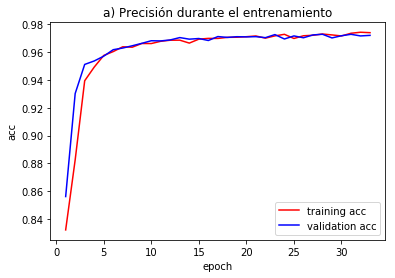

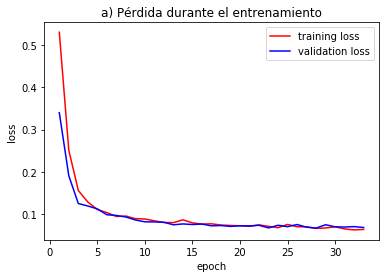

In [309]:
#Gráficas durante el entrenamiento

# Gráfica de precisión
epochs = np.arange(1,len(unet2_2_csv['acc'])+1)
plt.title('a) Precisión durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(epochs,unet2_2_csv['acc'],'r',label='training acc')
plt.plot(epochs,unet2_2_csv['val_acc'],'b',label='validation acc')
plt.legend(loc='best')

plt.show()

# Gráfica de pérdida
epochs = np.arange(1,len(unet2_2_csv['acc'])+1)
plt.title('a) Pérdida durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,unet2_2_csv['loss'],'r',label='training loss')
plt.plot(epochs,unet2_2_csv['val_loss'],'b',label='validation loss')
plt.legend(loc='best')

plt.show()

In [310]:
# Predict on train, val and test
model = load_model('model-tfm2019-Unet2-2.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

65/65 [==============================] - ETA:  - ETA:  - 4s 63ms/step


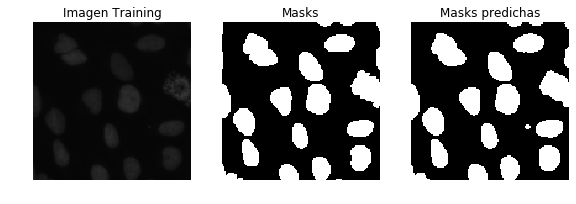

In [311]:
#Perform a sanity check on some training samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[22])
plt.title('Imagen Training')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_train_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

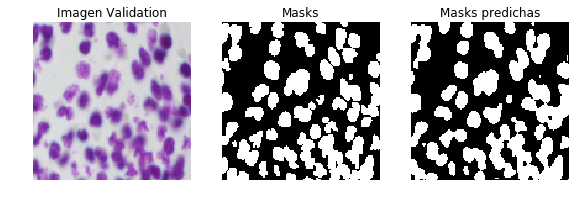

In [312]:
#Perform a sanity check on some validation samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][22])
plt.title('Imagen Validation')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_val_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

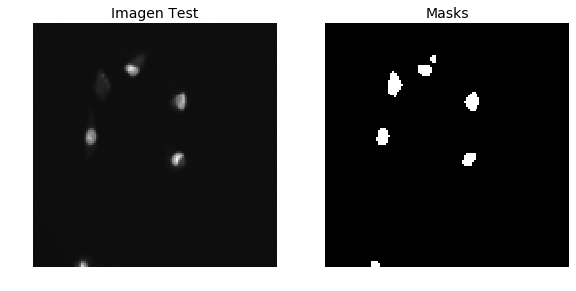

In [313]:
#Probar con algunas imágenes de test
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(X_test[16])
plt.title('Imagen Test', fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(preds_test_t[16]), cmap='gray')
plt.title('Masks', fontsize=14)
plt.axis('off')

plt.show()

In [314]:
######### AÑADIR AL DATAFRAME DE RESULTADOS GLOBALES ###################

UNET3=[]

for a in range(len(preds_train)):
    labels,nlabels=ndimage.label(np.squeeze(preds_train_t[a]))
    UNET3.append(nlabels)


for a in range(len(preds_val)):
    labels,nlabels=ndimage.label(np.squeeze(preds_val_t[a]))
    UNET3.append(nlabels)

# 4) UNet 3 - Modificada

Modificamos los filtros ajustándonos a la real

In [316]:
#Definir las etapas del modelo
def bloque_1_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding='same'):
    #Bloque de contracción
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(c)
    p = MaxPooling2D((2, 2))(c)
    return c, p

def bloque_2_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding="same"):
    #Bloque medio
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

def bloque_3_UNet(x, skip, filters, dropout_val, kernel_size=(3, 3), padding="same", strides=(2, 2)):
    #Bloque de expasión
    up = Conv2DTranspose(filters, (2, 2), strides= strides, padding=padding)(x)
    up = concatenate([up, skip])
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(up)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

In [317]:
#Crear modelo
def UNet():
    f = [64, 128, 256, 512, 1024]
    d = [0.1, 0.2, 0.3]
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    s0 = Lambda(lambda x: x / 255) (inputs)
    
    c1, p1 = bloque_1_UNet(s0, f[0], d[0]) #128 -> 64
    c2, p2 = bloque_1_UNet(p1, f[1], d[0]) #64 -> 32
    c3, p3 = bloque_1_UNet(p2, f[2], d[1]) #32 -> 16
    c4, p4 = bloque_1_UNet(p3, f[3], d[1]) #16->8
    
    b2 = bloque_2_UNet(p4, f[4], d[2])
    
    u1 = bloque_3_UNet(b2, c4, f[3], d[1]) #8 -> 16
    u2 = bloque_3_UNet(u1, c3, f[2], d[1]) #16 -> 32
    u3 = bloque_3_UNet(u2, c2, f[1], d[0]) #32 -> 64
    u4 = bloque_3_UNet(u3, c1, f[0], d[0]) #64 -> 128
    
    outputs = Conv2D(1, (1, 1), activation="sigmoid")(u4)
    
    model_unet = Model(inputs=[inputs], outputs=[outputs])
    return model_unet

In [318]:
#Compilar modelo
warnings.simplefilter("ignore", UserWarning)

modelo_Unet_3 = UNet()
modelo_Unet_3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
modelo_Unet_3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 128, 128, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 128, 128, 64) 1792        lambda_4[0][0]                   
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 128, 128, 64) 0           conv2d_50[0][0]                  
__________________________________________________________________________________________________
conv2d_51 

__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 128, 128, 64) 73792       concatenate_14[0][0]             
__________________________________________________________________________________________________
dropout_23 (Dropout)            (None, 128, 128, 64) 0           conv2d_66[0][0]                  
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 128, 128, 64) 36928       dropout_23[0][0]                 
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 128, 128, 1)  65          conv2d_67[0][0]                  
Total params: 31,031,745
Trainable params: 31,031,745
Non-trainable params: 0
__________________________________________________________________________________________________


In [232]:
#############################################################
####################### Entrenamiento #######################
#############################################################
warnings.simplefilter("ignore", UserWarning)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tfm2019-Unet3.h5', verbose=1, save_best_only=True)
results_tfm2019_Unet3 = modelo_Unet_3.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose = 0)


Epoch 00001: val_loss improved from inf to 0.32334, saving model to model-tfm2019-Unet3.h5



Epoch 00002: val_loss improved from 0.32334 to 0.15365, saving model to model-tfm2019-Unet3.h5



Epoch 00003: val_loss improved from 0.15365 to 0.10615, saving model to model-tfm2019-Unet3.h5



Epoch 00004: val_loss improved from 0.10615 to 0.10606, saving model to model-tfm2019-Unet3.h5



Epoch 00005: val_loss improved from 0.10606 to 0.08544, saving model to model-tfm2019-Unet3.h5



Epoch 00006: val_loss did not improve from 0.08544



Epoch 00007: val_loss did not improve from 0.08544



Epoch 00008: val_loss improved from 0.08544 to 0.07970, saving model to model-tfm2019-Unet3.h5



Epoch 00009: val_loss improved from 0.07970 to 0.07544, saving model to model-tfm2019-Unet3.h5



Epoch 00010: val_loss did not improve from 0.07544



Epoch 00011: val_loss did not improve from 0.07544



Epoch 00012: val_loss improved from 0.07544 to 0.07331, saving model to model-tfm2019-Unet3.h5



Epoch 00013: val_loss improved from 0.07331 to 0.07240, saving model to model-tfm2019-Unet3.h5



Epoch 00014: val_loss did not improve from 0.07240



Epoch 00015: val_loss did not improve from 0.07240



Epoch 00016: val_loss did not improve from 0.07240



Epoch 00017: val_loss improved from 0.07240 to 0.07200, saving model to model-tfm2019-Unet3.h5



Epoch 00018: val_loss did not improve from 0.07200



Epoch 00019: val_loss did not improve from 0.07200



Epoch 00020: val_loss improved from 0.07200 to 0.06700, saving model to model-tfm2019-Unet3.h5



Epoch 00021: val_loss did not improve from 0.06700



Epoch 00022: val_loss did not improve from 0.06700



Epoch 00023: val_loss did not improve from 0.06700



Epoch 00024: val_loss did not improve from 0.06700



Epoch 00025: val_loss did not improve from 0.06700
Epoch 00025: early stopping



In [233]:
#############################################################
################### Guardado de resultados ##################
#############################################################
unet3_df = pd.DataFrame(results_tfm2019_Unet3.history)

with open('Training_History/unet-3-history.csv', mode='w') as f:
    unet3_df.to_csv(f)

In [319]:
#Cargar los resultados del entrenamiento
unet3_csv = pd.read_csv('Training_History/unet-3-history.csv')

#Cambiamos el nombre de la primera columna para aclarar que se refiere a las épocas
unet3_csv.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)

print(unet3_csv)

    epoch  val_loss   val_acc      loss       acc
0       0  0.323336  0.873568  0.834052  0.819707
1       1  0.153653  0.938851  0.248032  0.893143
2       2  0.106147  0.958876  0.134382  0.948108
3       3  0.106058  0.960210  0.103471  0.960267
4       4  0.085441  0.965852  0.090156  0.965479
5       5  0.095490  0.965748  0.087358  0.966580
6       6  0.093576  0.965937  0.083674  0.967835
7       7  0.079700  0.968813  0.082477  0.967918
8       8  0.075436  0.969520  0.079969  0.969431
9       9  0.082139  0.966819  0.081009  0.968855
10     10  0.079294  0.968970  0.078681  0.969492
11     11  0.073307  0.970254  0.075276  0.970857
12     12  0.072395  0.970750  0.074416  0.971113
13     13  0.080214  0.968400  0.072542  0.971389
14     14  0.076065  0.970141  0.073548  0.971035
15     15  0.073175  0.971124  0.073663  0.971326
16     16  0.071999  0.970966  0.073867  0.971075
17     17  0.077334  0.969666  0.071139  0.972299
18     18  0.074650  0.970281  0.069914  0.972552


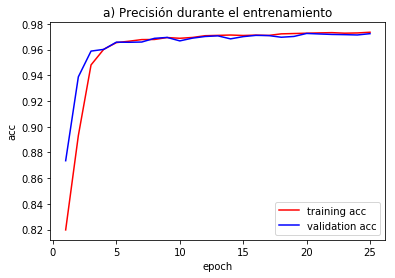

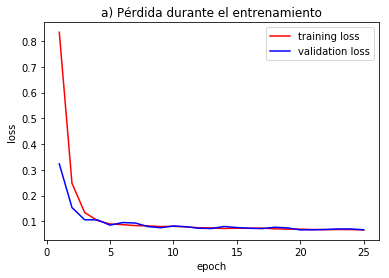

In [320]:
#Gráficas durante el entrenamiento

# Gráfica de precisión
epochs = np.arange(1,len(unet3_csv['acc'])+1)
plt.title('a) Precisión durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(epochs,unet3_csv['acc'],'r',label='training acc')
plt.plot(epochs,unet3_csv['val_acc'],'b',label='validation acc')
plt.legend(loc='best')

plt.show()

# Gráfica de pérdida
epochs = np.arange(1,len(unet3_csv['acc'])+1)
plt.title('a) Pérdida durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,unet3_csv['loss'],'r',label='training loss')
plt.plot(epochs,unet3_csv['val_loss'],'b',label='validation loss')
plt.legend(loc='best')

plt.show()

In [321]:
# Predict on train, val and test
model = load_model('model-tfm2019-Unet3.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

65/65 [==============================] - ETA: 17 - ETA: 0 - 34s 521ms/step


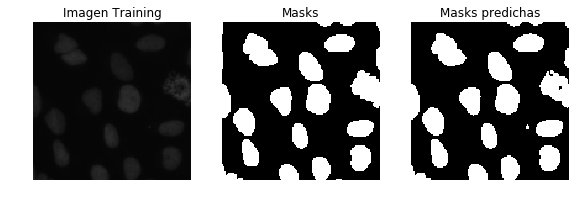

In [322]:
#Perform a sanity check on some training samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[22])
plt.title('Imagen Training')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_train_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

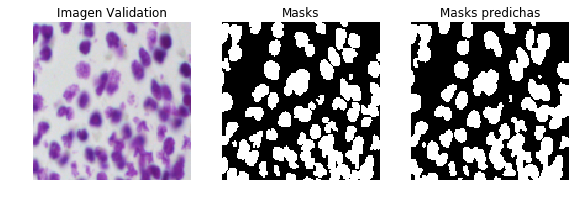

In [323]:
#Perform a sanity check on some validation samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][22])
plt.title('Imagen Validation')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_val_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

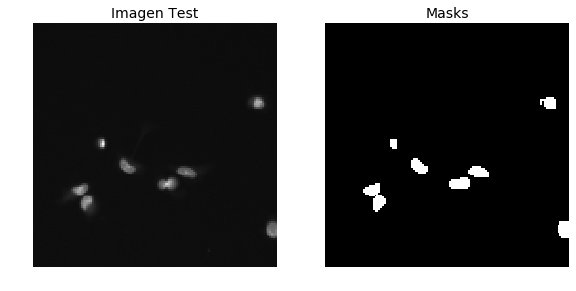

In [324]:
#Probar con algunas imágenes de test
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(X_test[15])
plt.title('Imagen Test',fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(preds_test_t[15]), cmap='gray')
plt.title('Masks',fontsize=14)
plt.axis('off')

plt.show()

In [325]:
######### AÑADIR AL DATAFRAME DE RESULTADOS GLOBALES ###################

UNET4=[]

for a in range(len(preds_train)):
    labels,nlabels=ndimage.label(np.squeeze(preds_train_t[a]))
    UNET4.append(nlabels)


for a in range(len(preds_val)):
    labels,nlabels=ndimage.label(np.squeeze(preds_val_t[a]))
    UNET4.append(nlabels)

# 5) UNet 4 - Aumentada

Introducimos 2 capas más de contracción y 2 más de expansión

In [327]:
#Definir las etapas del modelo
def bloque_1_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding='same'):
    #Bloque de contracción
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation='relu', kernel_initializer='he_normal')(c)
    p = MaxPooling2D((2, 2))(c)
    return c, p

def bloque_2_UNet(x, filters, dropout_val, kernel_size=(3, 3), padding="same"):
    #Bloque medio
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(x)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

def bloque_3_UNet(x, skip, filters, dropout_val, kernel_size=(3, 3), padding="same", strides=(2, 2)):
    #Bloque de expasión
    up = Conv2DTranspose(filters, (2, 2), strides= strides, padding=padding)(x)
    up = concatenate([up, skip])
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(up)
    c = Dropout(dropout_val)(c)
    c = Conv2D(filters, kernel_size, padding=padding, activation="relu", kernel_initializer='he_normal')(c)
    return c

In [328]:
#Crear modelo
def UNet():
    f = [16, 32, 64, 128, 256, 512, 1024]
    d = [0.1, 0.2, 0.3, 0.4]
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    s0 = Lambda(lambda x: x / 255) (inputs)
    
    c1, p1 = bloque_1_UNet(s0, f[0], d[0]) #128 -> 64
    c2, p2 = bloque_1_UNet(p1, f[1], d[0]) #64 -> 32
    c3, p3 = bloque_1_UNet(p2, f[2], d[1]) #128 -> 64
    c4, p4 = bloque_1_UNet(p3, f[3], d[1]) #64 -> 32
    c5, p5 = bloque_1_UNet(p4, f[4], d[2]) #32 -> 16
    c6, p6 = bloque_1_UNet(p5, f[5], d[2]) #16->8
    
    b2 = bloque_2_UNet(p6, f[6], d[3])
    
    u1 = bloque_3_UNet(b2, c6, f[5], d[2]) #8 -> 16
    u2 = bloque_3_UNet(u1, c5, f[4], d[2]) #16 -> 32
    u3 = bloque_3_UNet(u2, c4, f[3], d[1]) #32 -> 64
    u4 = bloque_3_UNet(u3, c3, f[2], d[1]) #64 -> 128
    u5 = bloque_3_UNet(u4, c2, f[1], d[0]) #32 -> 64
    u6 = bloque_3_UNet(u5, c1, f[0], d[0]) #64 -> 128
    
    outputs = Conv2D(1, (1, 1), activation="sigmoid")(u6)
    
    model_unet = Model(inputs=[inputs], outputs=[outputs])
    return model_unet

In [329]:
#Compilar modelo
warnings.simplefilter("ignore", UserWarning)

modelo_Unet_4 = UNet()
modelo_Unet_4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
modelo_Unet_4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 128, 128, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 128, 128, 16) 448         lambda_5[0][0]                   
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 128, 128, 16) 0           conv2d_69[0][0]                  
__________________________________________________________________________________________________
conv2d_70 

__________________________________________________________________________________________________
conv2d_transpose_17 (Conv2DTran (None, 16, 16, 128)  131200      conv2d_86[0][0]                  
__________________________________________________________________________________________________
concatenate_17 (Concatenate)    (None, 16, 16, 256)  0           conv2d_transpose_17[0][0]        
                                                                 conv2d_76[0][0]                  
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 16, 16, 128)  295040      concatenate_17[0][0]             
__________________________________________________________________________________________________
dropout_33 (Dropout)            (None, 16, 16, 128)  0           conv2d_87[0][0]                  
__________________________________________________________________________________________________
conv2d_88 

In [59]:
#############################################################
####################### Entrenamiento #######################
#############################################################
warnings.simplefilter("ignore", UserWarning)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tfm2019-Unet4.h5', verbose=1, save_best_only=True)
results_tfm2019_Unet4 = modelo_Unet_4.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose = 0)

Instructions for updating:
Use tf.cast instead.



Epoch 00001: val_loss improved from inf to 0.53586, saving model to model-tfm2019-Unet4.h5



Epoch 00002: val_loss improved from 0.53586 to 0.25742, saving model to model-tfm2019-Unet4.h5



Epoch 00003: val_loss improved from 0.25742 to 0.20532, saving model to model-tfm2019-Unet4.h5



Epoch 00004: val_loss improved from 0.20532 to 0.12964, saving model to model-tfm2019-Unet4.h5



Epoch 00005: val_loss improved from 0.12964 to 0.11442, saving model to model-tfm2019-Unet4.h5



Epoch 00006: val_loss improved from 0.11442 to 0.10004, saving model to model-tfm2019-Unet4.h5



Epoch 00007: val_loss improved from 0.10004 to 0.09985, saving model to model-tfm2019-Unet4.h5



Epoch 00008: val_loss improved from 0.09985 to 0.09689, saving model to model-tfm2019-Unet4.h5



Epoch 00009: val_loss improved from 0.09689 to 0.09399, saving model to model-tfm2019-Unet4.h5



Epoch 00010: val_loss improved from 0.09399 to 0.08908, saving model to model-tfm2019-Unet4.h5



Epoch 00011: val_loss did not improve from 0.08908



Epoch 00012: val_loss improved from 0.08908 to 0.08455, saving model to model-tfm2019-Unet4.h5



Epoch 00013: val_loss did not improve from 0.08455



Epoch 00014: val_loss did not improve from 0.08455



Epoch 00015: val_loss improved from 0.08455 to 0.08448, saving model to model-tfm2019-Unet4.h5



Epoch 00016: val_loss improved from 0.08448 to 0.08231, saving model to model-tfm2019-Unet4.h5



Epoch 00017: val_loss did not improve from 0.08231



Epoch 00018: val_loss improved from 0.08231 to 0.07969, saving model to model-tfm2019-Unet4.h5



Epoch 00019: val_loss did not improve from 0.07969



Epoch 00020: val_loss improved from 0.07969 to 0.07959, saving model to model-tfm2019-Unet4.h5



Epoch 00021: val_loss improved from 0.07959 to 0.07871, saving model to model-tfm2019-Unet4.h5



Epoch 00022: val_loss did not improve from 0.07871



Epoch 00023: val_loss improved from 0.07871 to 0.07793, saving model to model-tfm2019-Unet4.h5



Epoch 00024: val_loss improved from 0.07793 to 0.07789, saving model to model-tfm2019-Unet4.h5



Epoch 00025: val_loss improved from 0.07789 to 0.07448, saving model to model-tfm2019-Unet4.h5



Epoch 00026: val_loss improved from 0.07448 to 0.07292, saving model to model-tfm2019-Unet4.h5



Epoch 00027: val_loss did not improve from 0.07292



Epoch 00028: val_loss improved from 0.07292 to 0.07287, saving model to model-tfm2019-Unet4.h5



Epoch 00029: val_loss improved from 0.07287 to 0.07250, saving model to model-tfm2019-Unet4.h5



Epoch 00030: val_loss did not improve from 0.07250



Epoch 00031: val_loss improved from 0.07250 to 0.06931, saving model to model-tfm2019-Unet4.h5



Epoch 00032: val_loss did not improve from 0.06931



Epoch 00033: val_loss improved from 0.06931 to 0.06915, saving model to model-tfm2019-Unet4.h5



Epoch 00034: val_loss improved from 0.06915 to 0.06751, saving model to model-tfm2019-Unet4.h5



Epoch 00035: val_loss did not improve from 0.06751



Epoch 00036: val_loss did not improve from 0.06751



Epoch 00037: val_loss did not improve from 0.06751



Epoch 00038: val_loss did not improve from 0.06751



Epoch 00039: val_loss did not improve from 0.06751
Epoch 00039: early stopping



In [60]:
#############################################################
################### Guardado de resultados ##################
#############################################################
unet4_df = pd.DataFrame(results_tfm2019_Unet4.history)

with open('Training_History/unet-4-history.csv', mode='w') as f:
    unet4_df.to_csv(f)

In [330]:
#Cargar los resultados del entrenamiento
unet4_csv = pd.read_csv('Training_History/unet-4-history.csv')

#Cambiamos el nombre de la primera columna para aclarar que se refiere a las épocas
unet4_csv.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)

print(unet4_csv)

    epoch  val_loss   val_acc      loss       acc
0       0  0.535860  0.848326  0.629800  0.807053
1       1  0.257416  0.858690  0.376235  0.839479
2       2  0.205325  0.869973  0.260995  0.851931
3       3  0.129644  0.948301  0.181672  0.915751
4       4  0.114421  0.955032  0.133768  0.948928
5       5  0.100037  0.960713  0.117284  0.954778
6       6  0.099847  0.960327  0.116500  0.954638
7       7  0.096895  0.962261  0.114450  0.957479
8       8  0.093990  0.962964  0.098549  0.962255
9       9  0.089078  0.965099  0.100737  0.961557
10     10  0.092615  0.965188  0.094390  0.963963
11     11  0.084554  0.966756  0.094527  0.963717
12     12  0.103643  0.961383  0.089630  0.965674
13     13  0.095262  0.965143  0.090985  0.965116
14     14  0.084480  0.967381  0.089325  0.965521
15     15  0.082312  0.966721  0.085441  0.967041
16     16  0.086483  0.967732  0.084416  0.967394
17     17  0.079685  0.969059  0.082196  0.968254
18     18  0.083516  0.968616  0.081448  0.968270


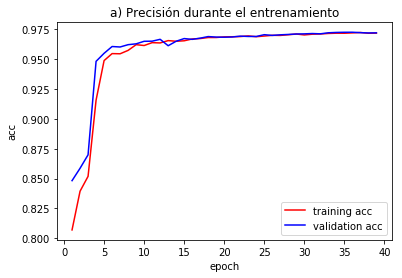

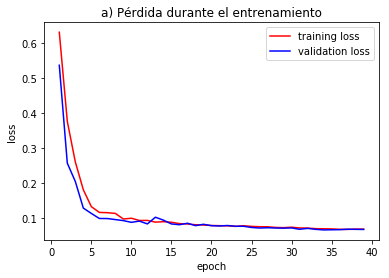

In [331]:
#Gráficas durante el entrenamiento

# Gráfica de precisión
epochs = np.arange(1,len(unet4_csv['acc'])+1)
plt.title('a) Precisión durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(epochs,unet4_csv['acc'],'r',label='training acc')
plt.plot(epochs,unet4_csv['val_acc'],'b',label='validation acc')
plt.legend(loc='best')

plt.show()

# Gráfica de pérdida
epochs = np.arange(1,len(unet4_csv['acc'])+1)
plt.title('a) Pérdida durante el entrenamiento')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,unet4_csv['loss'],'r',label='training loss')
plt.plot(epochs,unet4_csv['val_loss'],'b',label='validation loss')
plt.legend(loc='best')

plt.show()

In [332]:
# Predict on train, val and test
model = load_model('model-tfm2019-Unet4.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

65/65 [==============================] - ETA:  - ETA:  - 6s 85ms/step


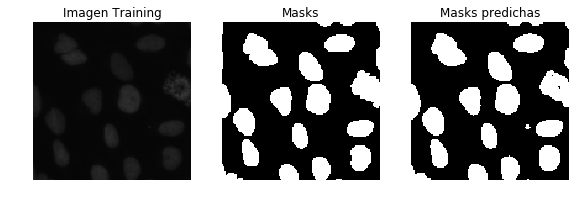

In [333]:
#Perform a sanity check on some training samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[22])
plt.title('Imagen Training')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_train_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

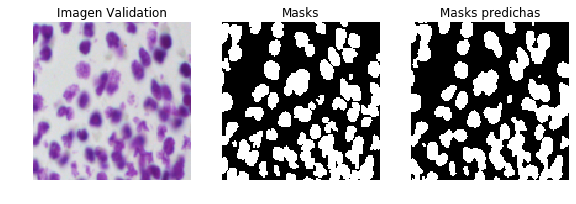

In [334]:
#Perform a sanity check on some validation samples
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,3,1)
plt.imshow(X_train[int(X_train.shape[0]*0.9):][22])
plt.title('Imagen Validation')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][22]), cmap='gray')
plt.title('Masks')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(preds_val_t[22]), cmap='gray')
plt.title('Masks predichas')
plt.axis('off')

plt.show()

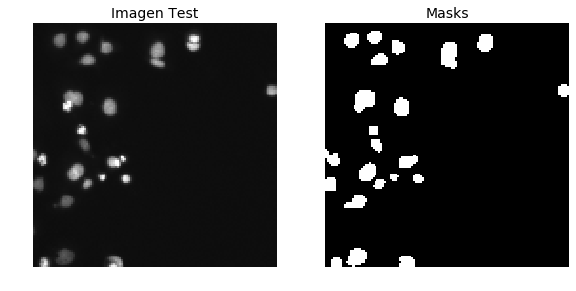

In [335]:
#Probar con algunas imágenes de test
plt.figure(figsize=(6.4*1.5, 4.8*1.5))
plt.subplot(1,2,1)
plt.imshow(X_test[13])
plt.title('Imagen Test',fontsize=14)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(preds_test_t[13]), cmap='gray')
plt.title('Masks', fontsize=14)
plt.axis('off')

plt.show()

In [336]:
######### AÑADIR AL DATAFRAME DE RESULTADOS GLOBALES ###################

UNET5=[]

for a in range(len(preds_train)):
    labels,nlabels=ndimage.label(np.squeeze(preds_train_t[a]))
    UNET5.append(nlabels)


for a in range(len(preds_val)):
    labels,nlabels=ndimage.label(np.squeeze(preds_val_t[a]))
    UNET5.append(nlabels)

# Fin

# ANEXO

Código para almacenar todos los resultados en una tabla

In [353]:
#a = 36
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage import feature
from scipy.ndimage import distance_transform_edt
from skimage import measure
from skimage import morphology, segmentation

RUTA=[]
Experto=[]
Orig_Mask=[]
Adap_gauss=[]
Adap_mean=[]
Otsu=[]
K_MEANS=[]
MORF=[]
CANNY=[]
WATER_BYN=[]
WATER_LAPLACIAN=[]
WATER_SOBEL=[]
    


for a in range(len(TRAINING_IDs)):
    print(a)
    original_image = X_train[a]
    mask_original_image = np.squeeze(Y_train[a])

    #El número de masks son los mask que separó el experto en la carpeta
    numero_masks=len(glob.glob(str(masks_paths_list[a])+'/masks/*.png'))
    
    #----->RUTA DE LA IMAGEN
    RUTA.append(str(images_paths_list[a]))
    
    #----->EXPERTO
    Experto.append(numero_masks)
    
    
    #------>ORIGINAL MASK
    labels_mask,nlabels_mask=ndimage.label(mask_original_image)
    Orig_Mask.append(nlabels_mask)
    
    
    #Pasamos de BGR a blanco y negro con OpenCV
    gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

    gaus_blur = cv2.GaussianBlur(gray_image,(3,3),0)
    gaus_blur_2 = cv2.GaussianBlur(gray_image,(5,5),0)

    #Threshold Adaptativo
    adaptative_gaussian=cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,5)
    adaptative_mean=cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)
    if(np.sum(adaptative_gaussian==255)>np.sum(adaptative_gaussian==0)):
            adaptative_gaussian=cv2.bitwise_not(adaptative_gaussian)

    if(np.sum(adaptative_mean==255)>np.sum(adaptative_mean==0)):
            adaptative_mean=cv2.bitwise_not(adaptative_mean)

    #------>ADAPTATIVE GAUSSIAN        
    labels,nlabels=ndimage.label(adaptative_gaussian)
    Adap_gauss.append(nlabels)

    
    #------>ADAPTATIVE MEAN
    labels,nlabels=ndimage.label(adaptative_mean)
    Adap_mean.append(nlabels)
    
    
    #Otsu
    val1, otsu1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    if(np.sum(otsu1==255)>np.sum(otsu1==0)):
            otsu1=cv2.bitwise_not(otsu1)
            
    #------>OTSU        
    labels,nlabels=ndimage.label(otsu1)
    Otsu.append(nlabels)
    
    #K-means
    
    K=2 

    #Conversión a un array de 2 dimensiones para fit (length*width, channels=1)
    gray_image_2d = gray_image.reshape(gray_image.shape[0]*gray_image.shape[1],1)

    kmeans_modelo=KMeans(n_clusters=K)
    kmeans = kmeans_modelo.fit(gray_image_2d)

    kmeans_labels = kmeans.labels_

    if (list(kmeans_labels).count(0)<list(kmeans_labels).count(1)):
        kmeans_labels = np.where(kmeans_labels, 1 - kmeans_labels, 1 - kmeans_labels)

    #Reshape a las dimensiones de la imagen original en blanco y negro
    kmeans_image = kmeans_labels.reshape(gray_image.shape)
    
    
    #------>K-MEANS
    labels,nlabels=ndimage.label(kmeans_image)
    K_MEANS.append(nlabels)
    

    #Morfologia
    #Definición del Kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))

    #Erosión + Dilatación
    morph_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

    #Binarización
    value_th, img_th = cv2.threshold(morph_image,0,255,cv2.THRESH_OTSU)
    #Erosión + Dilatación 2
    morph_image_2=cv2.morphologyEx(img_th, cv2.MORPH_OPEN, kernel)

    #Aplicar color a cada componente separado
    cc=cv2.connectedComponents(morph_image_2)[1]

    if(np.sum(morph_image_2==255)>np.sum(morph_image_2==0)):
            morph_image_2=cv2.bitwise_not(morph_image_2)
            
    #------>MORFOLOGIA
    labels,nlabels=ndimage.label(morph_image_2)
    MORF.append(nlabels)
    
    
    
    #Canny
    edges = cv2.Canny(image = gaus_blur_2, threshold1 = 0,threshold2 = val1)
    #Filtro inicial para completar los círculos y eliminar ruido
    blur2 = cv2.GaussianBlur(edges,(3,3),0)
    #Devuelve una lista de contornos que ha encontrado
    canny_cont=cv2.findContours(blur2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]

    #Rellenar los bordes encontrados
    background=np.zeros(gray_image.shape) #Nueva matriz porque superpone los resultados
    canny_mask=cv2.drawContours(background,canny_cont,-1,255,-1) # -1--> todos los contornos
    
    
    
    #------>CANNY
    labels,nlabels=ndimage.label(canny_mask)
    CANNY.append(nlabels)
    
    #Watershed
    
    #Sobel
    image_astype = gray_image.astype('int32')
    derivative_x = ndimage.sobel(image_astype, 0)
    derivative_y = ndimage.sobel(image_astype, 1)
    magnitude = np.hypot(derivative_x, derivative_y)
    # Normalización
    magnitude *= 255.0 / np.max(magnitude) 
 
    
    #Laplacian
    blur = cv2.GaussianBlur(gray_image,(3,3),0)
    laplacian = cv2.Laplacian(blur,cv2.CV_64F)
    
    
    
    edges_gray=feature.canny(gray_image, sigma=0)     #3???????????
    edges_laplacian=feature.canny(laplacian, sigma=5)
    edges_sobel=feature.canny(magnitude, sigma=4)

    dt1= distance_transform_edt(~edges_gray)
    dt2= distance_transform_edt(~edges_laplacian)
    dt3= distance_transform_edt(~edges_sobel)
    
    #Máximos locales
    local_max1=feature.peak_local_max(dt1, indices=False, min_distance=1)
    local_max2=feature.peak_local_max(dt2, indices=False, min_distance=5)
    local_max3=feature.peak_local_max(dt3, indices=False, min_distance=7)
    
    #Array de los máximos locales
    peak_idx1 = feature.peak_local_max(dt1, indices=True, min_distance=1)
    peak_idx2 = feature.peak_local_max(dt2, indices=True, min_distance=5)
    peak_idx3 = feature.peak_local_max(dt3, indices=True, min_distance=7)

    markers1 = measure.label(local_max1)
    markers2 = measure.label(local_max2)
    markers3 = measure.label(local_max3)

    #Watershed
    labels1 = morphology.watershed(-dt1, markers1)
    labels2 = morphology.watershed(-dt2, markers2)
    labels3 = morphology.watershed(-dt3, markers3)
    
    #Deberíamos ser capaces de separar background y foreground con intensidades
    regions1=measure.regionprops(labels1, intensity_image=gray_image)
    regions2=measure.regionprops(labels2, intensity_image=gray_image)
    regions3=measure.regionprops(labels3, intensity_image=gray_image)

    #Relación entre regiones y su intensidad
    region_means1 = [r.mean_intensity for r in regions1]
    region_means2 = [r.mean_intensity for r in regions2]
    region_means3 = [r.mean_intensity for r in regions3]


   #KMeans tomará la decisión de lo que es background y foreground para cada imagen

    model1=KMeans(n_clusters=2)
    model2=KMeans(n_clusters=2)
    model3=KMeans(n_clusters=2)

    #Formato columna
    region_means1 = np.array(region_means1).reshape(-1,1)
    region_means2 = np.array(region_means2).reshape(-1,1)
    region_means3 = np.array(region_means3).reshape(-1,1)
    
    if (a == 351) or (a==385): #Valores para los que no detecta objetos por BYN
        model2.fit(region_means2)
        model3.fit(region_means3)

        bg_fg_labels2 = model2.predict(region_means2)
        bg_fg_labels3 = model3.predict(region_means3)

        classified_labels2 = labels2.copy()
        classified_labels3 = labels3.copy()

        for bg_fg2, region2 in zip(bg_fg_labels2, regions2):
            classified_labels2[tuple(region2.coords.T)] = bg_fg2

        for bg_fg3, region3 in zip(bg_fg_labels3, regions3):
            classified_labels3[tuple(region3.coords.T)] = bg_fg3

        mask_laplacian1=np.where(classified_labels2 > 0, 1, 0)
        mask_sobel1=np.where(classified_labels3 > 0, 1, 0)

        if (np.count_nonzero(mask_laplacian1 == 0)<np.count_nonzero(mask_laplacian1 == 1)):
            mask_laplacian1 = np.where(mask_laplacian1, 1 - mask_laplacian1, 1 - mask_laplacian1)

        if (np.count_nonzero(mask_sobel1 == 0)<np.count_nonzero(mask_sobel1 == 1)):
            mask_sobel1 = np.where(mask_sobel1, 1 - mask_sobel1, 1 - mask_sobel1)

        #------>WATERSHED BYN    
        WATER_BYN.append(0)

        #------>WATERSHED LAPLACIAN
        labels,nlabels=ndimage.label(mask_laplacian1)
        WATER_LAPLACIAN.append(nlabels)

        #------>WATERSHED SOBEL
        labels,nlabels=ndimage.label(mask_sobel1)
        WATER_SOBEL.append(nlabels)
    
        
    else: 
        model1.fit(region_means1)
        model2.fit(region_means2)
        model3.fit(region_means3)


        #Predicciones
        bg_fg_labels1 = model1.predict(region_means1)
        bg_fg_labels2 = model2.predict(region_means2)
        bg_fg_labels3 = model3.predict(region_means3)

        #Clasificación en background - foreground
        classified_labels1 = labels1.copy()
        classified_labels2 = labels2.copy()
        classified_labels3 = labels3.copy()

        for bg_fg1, region1 in zip(bg_fg_labels1, regions1):
            classified_labels1[tuple(region1.coords.T)] = bg_fg1

        for bg_fg2, region2 in zip(bg_fg_labels2, regions2):
            classified_labels2[tuple(region2.coords.T)] = bg_fg2

        for bg_fg3, region3 in zip(bg_fg_labels3, regions3):
            classified_labels3[tuple(region3.coords.T)] = bg_fg3

        mask_gray1 = np.where(classified_labels1 > 0, 1, 0)
        mask_laplacian1=np.where(classified_labels2 > 0, 1, 0)
        mask_sobel1=np.where(classified_labels3 > 0, 1, 0)

        #Asegurar que background es negro y foreground es blanco a pesar del random de KMeans
        if (np.count_nonzero(mask_gray1 == 0)<np.count_nonzero(mask_gray1 == 1)):
            mask_gray1 = np.where(mask_gray1, 1 - mask_gray1, 1 - mask_gray1)


        if (np.count_nonzero(mask_laplacian1 == 0)<np.count_nonzero(mask_laplacian1 == 1)):
            mask_laplacian1 = np.where(mask_laplacian1, 1 - mask_laplacian1, 1 - mask_laplacian1)

        if (np.count_nonzero(mask_sobel1 == 0)<np.count_nonzero(mask_sobel1 == 1)):
            mask_sobel1 = np.where(mask_sobel1, 1 - mask_sobel1, 1 - mask_sobel1)

        #------>WATERSHED BYN
        labels,nlabels=ndimage.label(mask_gray1)
        WATER_BYN.append(nlabels)

        #------>WATERSHED LAPLACIAN
        labels,nlabels=ndimage.label(mask_laplacian1)
        WATER_LAPLACIAN.append(nlabels)

        #------>WATERSHED SOBEL
        labels,nlabels=ndimage.label(mask_sobel1)
        WATER_SOBEL.append(nlabels)
    
    
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [355]:
Resultados_finales = pd.DataFrame(
{ 'RUTA': RUTA,
  'Experto' : Experto,
  'Mask Original': Orig_Mask,
  'Adap. Gauss' : Adap_gauss,
  'Adap. Media' : Adap_mean,
  'Otsu': Otsu,
  'K-means': K_MEANS,
  'Transf. morf.': MORF,
  'Canny': CANNY,
  'Watershed BYN': WATER_BYN,
  'Watershed Laplacian':WATER_LAPLACIAN,
  'Watershed Sobel': WATER_SOBEL,
  'U-Net simplificada': UNET1,
  'U-Net completa': UNET2,
  'U-Net sin dropout': UNET3,
  'U-Net modificada': UNET4,
  'U-Net aumentada': UNET5,
})

In [357]:
exportar_resultados_finales_csv = Resultados_finales.to_csv('Resultados.csv', index=None, sep=';')